<a href="https://colab.research.google.com/github/tahayusab/DSA210-Project/blob/main/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [ ]:
import pandas as pd

# List of your CSV filenames
file_names = [
    'Neighbors_Homosexuals.csv',
    'Neighbors_Immigrantsforeign_workers.csv',
    'Neighbors_People_of_a_different_race.csv',
    'Neighbors_People_of_a_different_religion.csv',
    'Neighbors_People_who_speak_a_different_language.csv'
]

# Common path to the CSVs
base_path = '/content/drive/My Drive/Colab Notebooks/DSA 210/Project/'

# Dictionary to hold the cleaned DataFrames
dataframes = {}

# Expected column names (excluding dummy index)
column_names = [
    'Country',
    'Mentioned (%)',
    'Not Mentioned (%)',
    "Don't Know (%)",
    'No Answer (%)',
    'Other Missing (%)',
    'Sample Size (N)'
]

# Function to load and clean each CSV
def load_and_clean_csv(file_path):
    df = pd.read_csv(file_path, sep=",", skiprows=7, header=None)

    if df.shape[1] == 8:
        df.columns = ['Index'] + column_names
        df = df.drop(columns=['Index'])  # Drop dummy index
    elif df.shape[1] == 7:
        df.columns = column_names
    else:
        raise ValueError(f"Unexpected number of columns in file: {file_path}")

    df['Country'] = df['Country'].str.strip()  # Clean country names

    # Clean and convert percentages to float
    percent_cols = df.columns[1:-1]
    for col in percent_cols:
        df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float)

    # Convert sample size to Int
    df['Sample Size (N)'] = pd.to_numeric(df['Sample Size (N)'], errors='coerce').astype('Int64')

    # Remove TOTAL or empty rows
    df = df[df['Country'].notna() & (df['Country'] != 'TOTAL')]

    return df

# Load and clean each file
for file in file_names:
    full_path = f"{base_path}/{file}"
    key = file.replace('.csv', '')  # use filename without extension as key
    dataframes[key] = load_and_clean_csv(full_path)

# Print first few rows of each cleaned DataFrame
for name, df in dataframes.items():
    print(f"\n=== {name} ===")
    print(df.head(6))



=== Neighbors_Homosexuals ===
      Country  Mentioned (%)  Not Mentioned (%)  Don't Know (%)  \
0     Albania           75.7               23.2             0.9   
1     Andorra            5.2               94.8             0.0   
2  Azerbaijan           85.8               11.3             2.2   
3   Argentina            8.6               91.4             0.0   
4   Australia           11.8               88.2             0.0   
5     Austria           10.6               85.9             1.0   

   No Answer (%)  Other Missing (%)  Sample Size (N)  
0            0.2                0.0             1454  
1            0.0                0.0             1004  
2            0.7                0.0             1817  
3            0.0                0.0             1003  
4            0.0                0.0             1813  
5            2.5                0.0             1651  

=== Neighbors_Immigrantsforeign_workers ===
      Country  Mentioned (%)  Not Mentioned (%)  Don't Know (%)  \
0 

In [ ]:
import pandas as pd

happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')


# Display basic info and first few rows
print("World Happiness Report Dataset:")

print(happiness_df.head())

# Drop rows with missing values (if any)
happiness_df.dropna(inplace=True)

# Optional: Display the number of unique countries and regions
print(f"Total unique countries: {happiness_df['Country'].nunique()}")
print(f"Regions in dataset: {happiness_df['Region'].unique()}")

# Save cleaned version if needed
happiness_df.to_csv('Cleaned_Happiness.csv', index=False)


World Happiness Report Dataset:
       Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0       Norway               1            7.537  1.616463  1.533524  0.796667   
1      Denmark               2            7.522  1.482383  1.551122  0.792566   
2      Iceland               3            7.504  1.480633  1.610574  0.833552   
3  Switzerland               4            7.494  1.564980  1.516912  0.858131   
4      Finland               5            7.469  1.443572  1.540247  0.809158   

    Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
0  0.635423    0.362012    0.315964  2.277027              94.6   
1  0.626007    0.355280    0.400770  2.313707              93.5   
2  0.627163    0.475540    0.153527  2.322715              94.5   
3  0.620071    0.290549    0.367007  2.276716              93.7   
4  0.617951    0.245483    0.382612  2.430182              91.2   

           Region  
0  Western Europe  
1  Western Europe  
2  Western Europe 

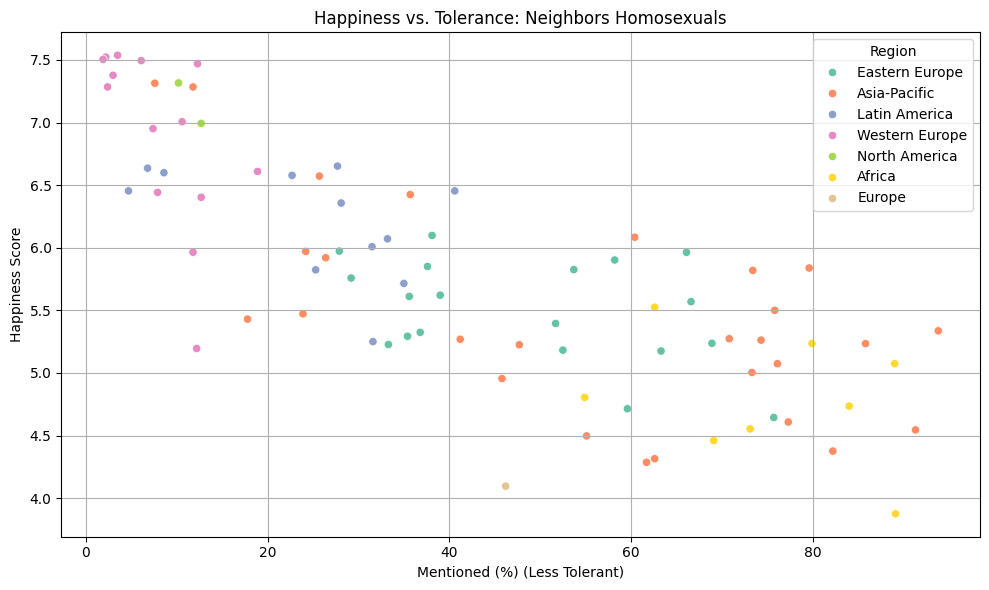

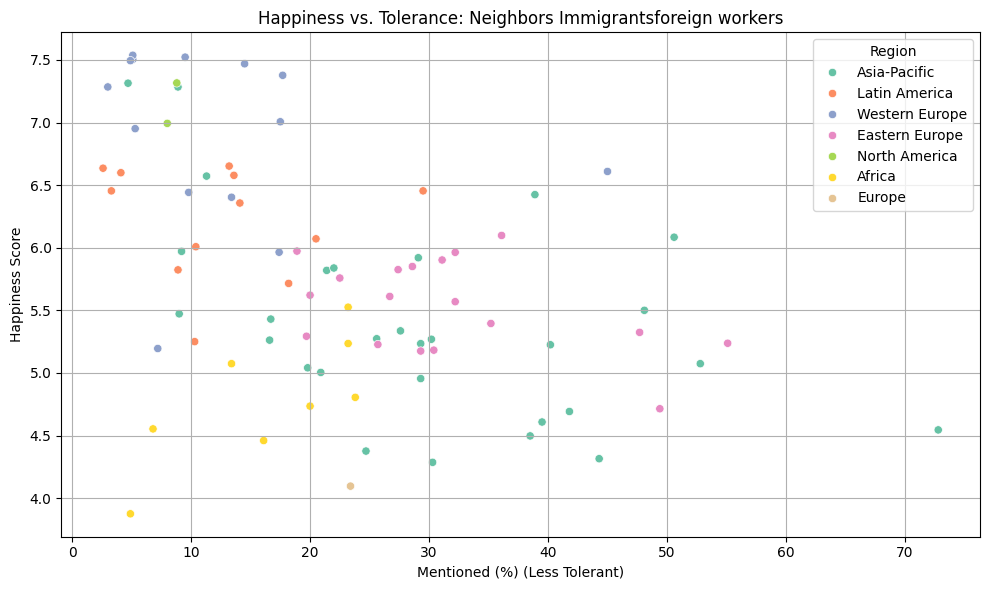

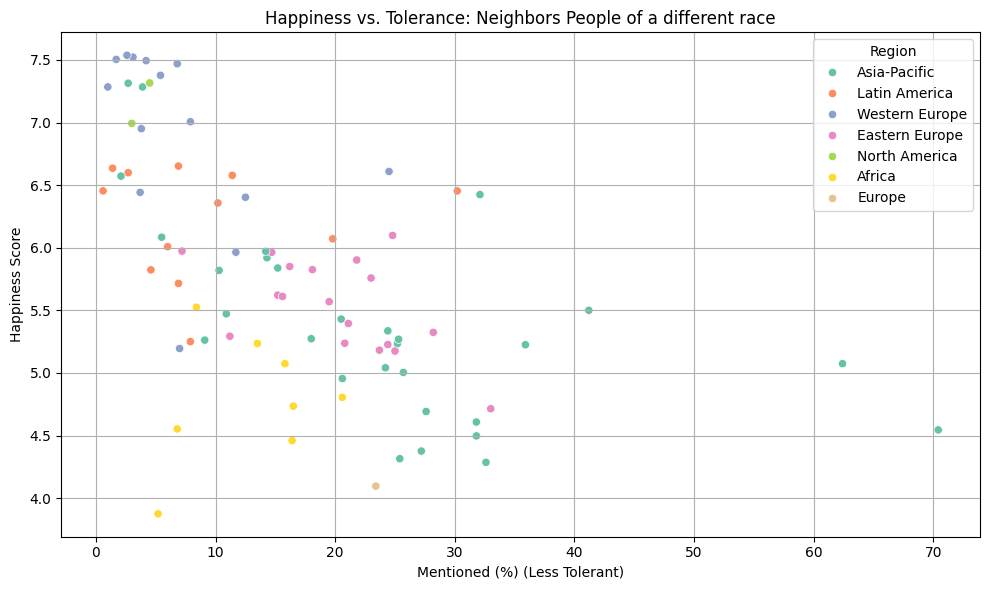

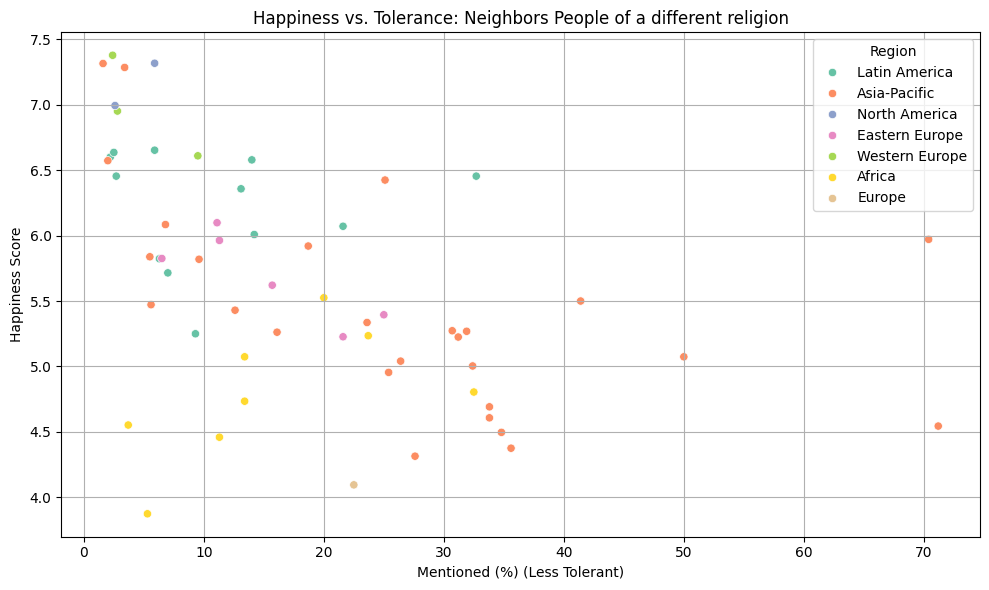

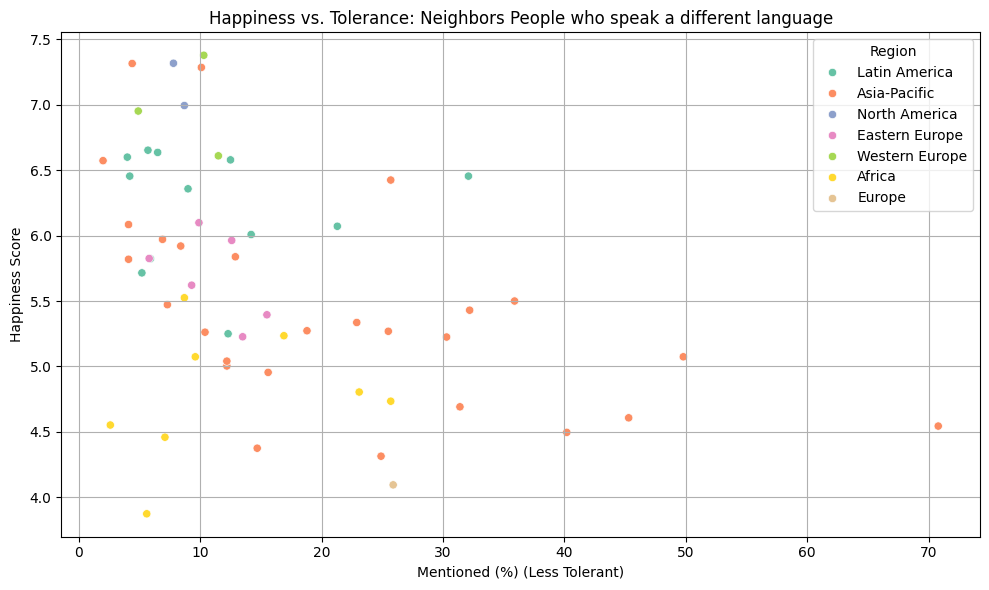

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned happiness data
happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')

# Clean Country names again just in case
happiness_df['Country'] = happiness_df['Country'].str.strip()

# Loop through each racism-related dataframe
for name, df in dataframes.items():
    merged = pd.merge(df, happiness_df, on='Country')

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=merged,
        x='Mentioned (%)',
        y='Happiness Score',
        hue='Region',
        palette='Set2'
    )

    plt.title(f'Happiness vs. Tolerance: {name.replace("_", " ")}')
    plt.xlabel('Mentioned (%) (Less Tolerant)')
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


       Happiness
count  57.000000
mean    5.678877
std     0.880282
min     3.875000
25%     5.074000
50%     5.621000
75%     6.424000
max     7.377000


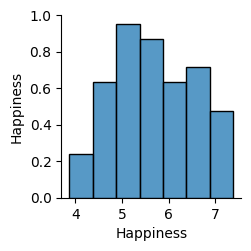


Pearson Correlation Matrix:
             Happiness  Homosexuals  Immigrants      Race  Religion  Language
Happiness     1.000000    -0.757158   -0.352847 -0.472572 -0.462492 -0.429314
Homosexuals  -0.757158     1.000000    0.473617  0.490177  0.427180  0.402089
Immigrants   -0.352847     0.473617    1.000000  0.841288  0.624333  0.730712
Race         -0.472572     0.490177    0.841288  1.000000  0.797665  0.888190
Religion     -0.462492     0.427180    0.624333  0.797665  1.000000  0.732580
Language     -0.429314     0.402089    0.730712  0.888190  0.732580  1.000000

Spearman Correlation Matrix:
             Happiness  Homosexuals  Immigrants      Race  Religion  Language
Happiness     1.000000    -0.758431   -0.376619 -0.563886 -0.585535 -0.459851
Homosexuals  -0.758431     1.000000    0.514763  0.551009  0.547912  0.411632
Immigrants   -0.376619     0.514763    1.000000  0.841564  0.706539  0.669368
Race         -0.563886     0.551009    0.841564  1.000000  0.847460  0.816524
Relig

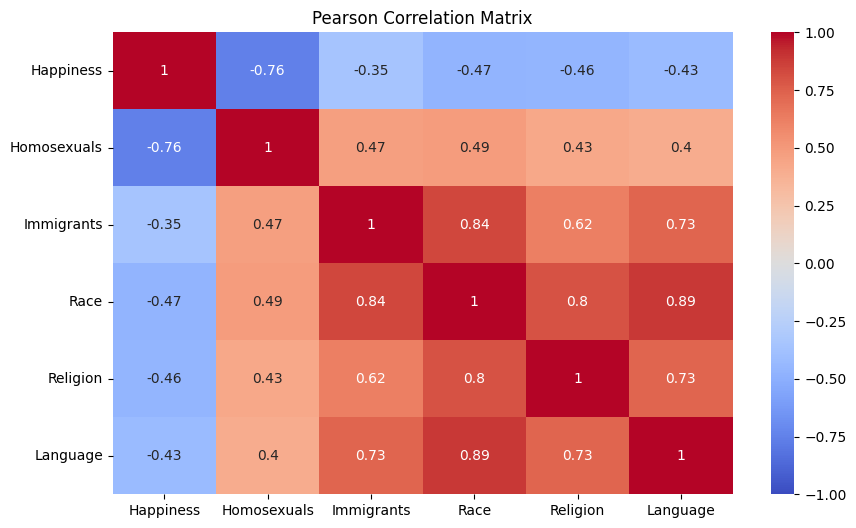

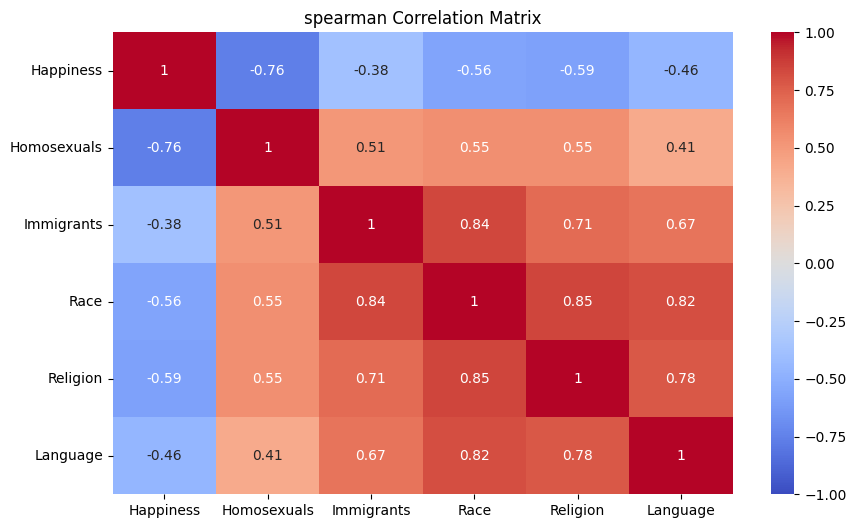

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind

# Step 1: Load Data
# Load World Happiness Index data
happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')

# Load racism-related datasets with skiprows
homosexuals_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv', skiprows=5)
immigrants_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv', skiprows=4)
race_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv', skiprows=4)
religion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv', skiprows=4)
language_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv', skiprows=4)

# Rename columns for consistency
for df in [homosexuals_df, immigrants_df, race_df, religion_df, language_df]:
    df.rename(columns={df.columns[0]: 'Country', 'Mentioned (%)': 'Mentioned'}, inplace=True)
    df['Country'] = df['Country'].str.strip()

# Step 2: Clean and Merge Data
happiness_df['Country'] = happiness_df['Country'].str.strip()
merged_df = happiness_df[['Country', 'Happiness Score']].copy()
merged_df = merged_df.merge(homosexuals_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(immigrants_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Immigrants'))
merged_df = merged_df.merge(race_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(religion_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Religion'))
merged_df = merged_df.merge(language_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Language'))

# Rename columns clearly
merged_df.columns = ['Country', 'Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

# Drop rows with missing values
merged_df = merged_df.dropna()

# Step 3: Exploratory Data Analysis
print(merged_df.describe())

# Pairplot visualization
sns.pairplot(merged_df[['Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']])
plt.show()

# Step 4: Correlation Analysis
pearson_corr = merged_df.drop(columns='Country').corr(method='pearson')
spearman_corr = merged_df.drop(columns='Country').corr(method='spearman')


print("\nPearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Step 5: Hypothesis Testing - T-test
high_happiness = merged_df[merged_df['Happiness'] > merged_df['Happiness'].median()]
low_happiness = merged_df[merged_df['Happiness'] <= merged_df['Happiness'].median()]
# Convert relevant columns to numeric (coerce errors into NaN)
for col in ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')



# Step 6: Visualize Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("spearman Correlation Matrix")
plt.show()


In [ ]:
# Load all racism-related datasets correctly
homosexuals_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv', skiprows=5)
immigrants_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv', skiprows=4)
race_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv', skiprows=4)
religion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv', skiprows=4)
language_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv', skiprows=4)
print("Homosexuals columns:", homosexuals_df.columns.tolist())
print("Immigrants columns:", immigrants_df.columns.tolist())
print("Race columns:", race_df.columns.tolist())
print("Religion columns:", religion_df.columns.tolist())
print("Language columns:", language_df.columns.tolist())


Homosexuals columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Other missing; Multiple answers Mail (EVS) ', '(N)']
Immigrants columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Other missing; Multiple answers Mail (EVS) ', '(N)']
Race columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Other missing; Multiple answers Mail (EVS) ', '(N)']
Religion columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Missing; Not available', '(N)']
Language columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Missing; Not available', '(N)']


In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the cleaned happiness data
happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')

# Clean the 'Country' column to match with the racism datasets
happiness_df['Country'] = happiness_df['Country'].str.strip()

# Load the racism-related datasets with skiprows
homosexuals_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv', skiprows=5)
immigrants_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv', skiprows=4)
race_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv', skiprows=4)
religion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv', skiprows=4)
language_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv', skiprows=4)

# Merge the datasets with happiness data
merged_df = happiness_df[['Country', 'Happiness Score']].copy()

# Merge each racism dataset with happiness data
merged_df = merged_df.merge(homosexuals_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(immigrants_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Immigrants'))
merged_df = merged_df.merge(race_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Race'))
merged_df = merged_df.merge(religion_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Religion'))
merged_df = merged_df.merge(language_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Language'))

# Rename the columns for clarity
merged_df.columns = ['Country', 'Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

# Step 1: Check for missing values and handle them (if necessary)
merged_df.fillna(0, inplace=True)

# Step 2: Convert the 'Mentioned' columns to numeric, coercing errors to NaN and filling them with 0
merged_df['Homosexuals'] = pd.to_numeric(merged_df['Homosexuals'], errors='coerce').fillna(0)
merged_df['Immigrants'] = pd.to_numeric(merged_df['Immigrants'], errors='coerce').fillna(0)
merged_df['Race'] = pd.to_numeric(merged_df['Race'], errors='coerce').fillna(0)
merged_df['Religion'] = pd.to_numeric(merged_df['Religion'], errors='coerce').fillna(0)
merged_df['Language'] = pd.to_numeric(merged_df['Language'], errors='coerce').fillna(0)

# Step 3: Correlation Analysis (Pearson)
pearson_corr_homosexuals = merged_df['Homosexuals'].corr(merged_df['Happiness'])
pearson_corr_immigrants = merged_df['Immigrants'].corr(merged_df['Happiness'])
pearson_corr_race = merged_df['Race'].corr(merged_df['Happiness'])
pearson_corr_religion = merged_df['Religion'].corr(merged_df['Happiness'])
pearson_corr_language = merged_df['Language'].corr(merged_df['Happiness'])

# Display Pearson correlation results
print(f"Pearson Correlation for 'Homosexuals' with Happiness Score: {pearson_corr_homosexuals:.4f}")
print(f"Pearson Correlation for 'Immigrants' with Happiness Score: {pearson_corr_immigrants:.4f}")
print(f"Pearson Correlation for 'Race' with Happiness Score: {pearson_corr_race:.4f}")
print(f"Pearson Correlation for 'Religion' with Happiness Score: {pearson_corr_religion:.4f}")
print(f"Pearson Correlation for 'Language' with Happiness Score: {pearson_corr_language:.4f}")

# Step 4: Hypothesis Testing (T-test for difference in means)
# Split data based on median happiness scores
high_happiness = merged_df[merged_df['Happiness'] > merged_df['Happiness'].median()]
low_happiness = merged_df[merged_df['Happiness'] <= merged_df['Happiness'].median()]

# T-test for 'Homosexuals'
t_stat_homosexuals, p_value_homosexuals = stats.ttest_ind(high_happiness['Homosexuals'], low_happiness['Homosexuals'])
print(f"\nT-test for 'Homosexuals' between high and low happiness countries: t-stat = {t_stat_homosexuals:.4f}, p = {p_value_homosexuals:.4f}")
if p_value_homosexuals < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against homosexuals and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against homosexuals and happiness.")

# T-test for 'Immigrants'
t_stat_immigrants, p_value_immigrants = stats.ttest_ind(high_happiness['Immigrants'], low_happiness['Immigrants'])
print(f"T-test for 'Immigrants' between high and low happiness countries: t-stat = {t_stat_immigrants:.4f}, p = {p_value_immigrants:.4f}")
if p_value_immigrants < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against immigrants and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against immigrants and happiness.")

# T-test for 'Race'
t_stat_race, p_value_race = stats.ttest_ind(high_happiness['Race'], low_happiness['Race'])
print(f"T-test for 'Race' between high and low happiness countries: t-stat = {t_stat_race:.4f}, p = {p_value_race:.4f}")
if p_value_race < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against people of a different race and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against people of a different race and happiness.")

# T-test for 'Religion'
t_stat_religion, p_value_religion = stats.ttest_ind(high_happiness['Religion'], low_happiness['Religion'])
print(f"T-test for 'Religion' between high and low happiness countries: t-stat = {t_stat_religion:.4f}, p = {p_value_religion:.4f}")
if p_value_religion < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against people of a different religion and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against people of a different religion and happiness.")

# T-test for 'Language'
t_stat_language, p_value_language = stats.ttest_ind(high_happiness['Language'], low_happiness['Language'])
print(f"T-test for 'Language' between high and low happiness countries: t-stat = {t_stat_language:.4f}, p = {p_value_language:.4f}")
if p_value_language < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against people who speak a different language and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against people who speak a different language and happiness.")


Pearson Correlation for 'Homosexuals' with Happiness Score: -0.0247
Pearson Correlation for 'Immigrants' with Happiness Score: 0.0997
Pearson Correlation for 'Race' with Happiness Score: 0.0092
Pearson Correlation for 'Religion' with Happiness Score: -0.0193
Pearson Correlation for 'Language' with Happiness Score: -0.0046

T-test for 'Homosexuals' between high and low happiness countries: t-stat = -0.8936, p = 0.3729
H₀ should not be rejected: No significant relationship between racism against homosexuals and happiness.
T-test for 'Immigrants' between high and low happiness countries: t-stat = 0.6831, p = 0.4956
H₀ should not be rejected: No significant relationship between racism against immigrants and happiness.
T-test for 'Race' between high and low happiness countries: t-stat = -0.7269, p = 0.4684
H₀ should not be rejected: No significant relationship between racism against people of a different race and happiness.
T-test for 'Religion' between high and low happiness countries: t-s


Permutation Test for 'Homosexuals' with Happiness:
Actual correlation = -0.1184
P-value from permutation test = 0.4626
H₀ should not be rejected: No statistically significant correlation.


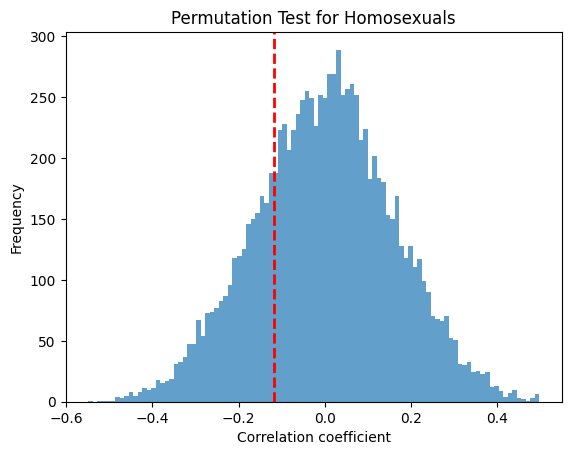


Permutation Test for 'Immigrants' with Happiness:
Actual correlation = 0.1361
P-value from permutation test = 0.4053
H₀ should not be rejected: No statistically significant correlation.


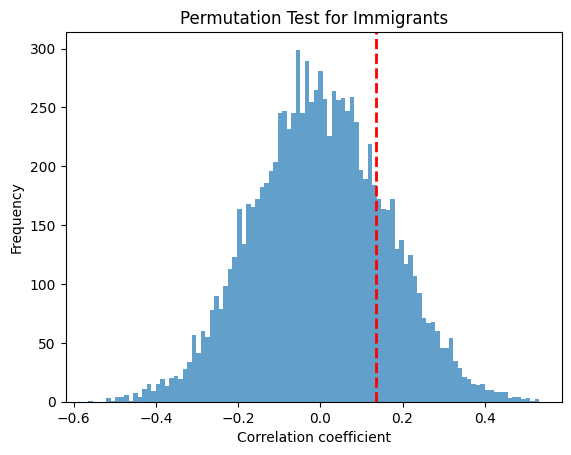


Permutation Test for 'Race' with Happiness:
Actual correlation = 0.0668
P-value from permutation test = 0.6824
H₀ should not be rejected: No statistically significant correlation.


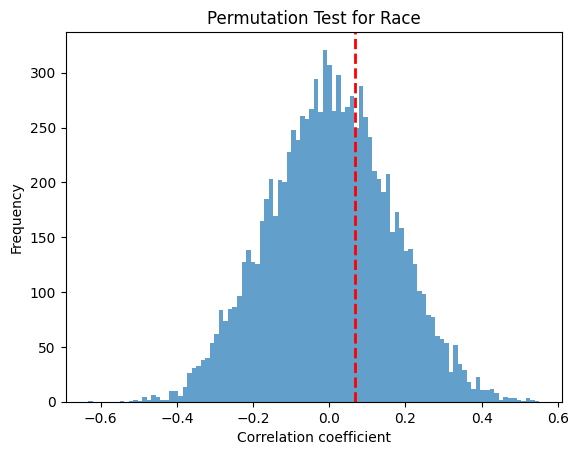


Permutation Test for 'Religion' with Happiness:
Actual correlation = 0.0268
P-value from permutation test = 0.8735
H₀ should not be rejected: No statistically significant correlation.


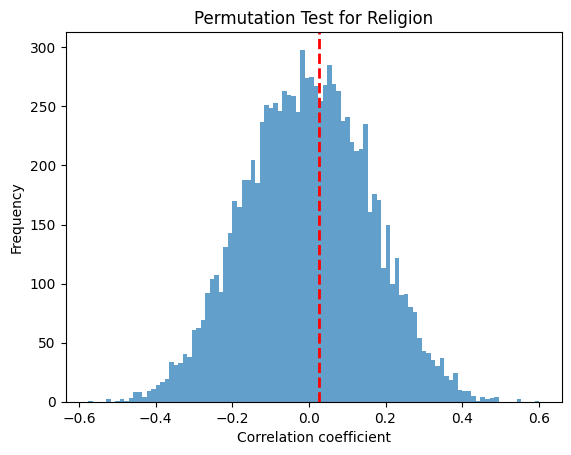


Permutation Test for 'Language' with Happiness:
Actual correlation = 0.0218
P-value from permutation test = 0.8935
H₀ should not be rejected: No statistically significant correlation.


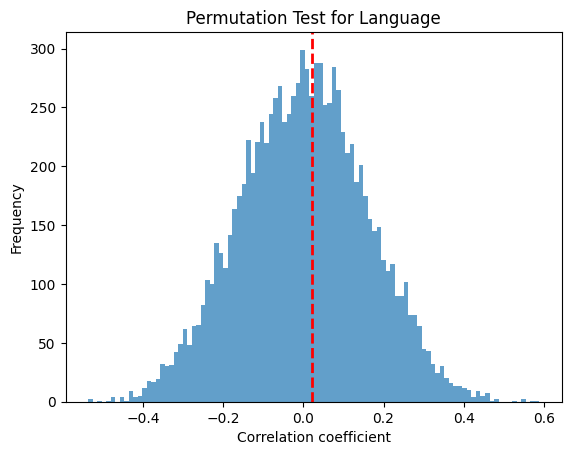

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Randomly choose 40 countries
sample_df = merged_df.sample(n=40, random_state=42).copy()

# Function to perform permutation test
def permutation_test(x, y, num_permutations=10000):
    actual_corr = np.corrcoef(x, y)[0, 1]
    count = 0
    corrs = []

    for _ in range(num_permutations):
        shuffled_y = np.random.permutation(y)
        corr = np.corrcoef(x, shuffled_y)[0, 1]
        corrs.append(corr)
        if abs(corr) >= abs(actual_corr):
            count += 1

    p_value = count / num_permutations

    return actual_corr, p_value, corrs

# Apply permutation test for each racism category
for col in ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']:
    actual_corr, p_val, rand_corrs = permutation_test(sample_df[col], sample_df['Happiness'])

    print(f"\nPermutation Test for '{col}' with Happiness:")
    print(f"Actual correlation = {actual_corr:.4f}")
    print(f"P-value from permutation test = {p_val:.4f}")
    if p_val < 0.05:
        print("H₀ should be rejected: There is a statistically significant correlation.")
    else:
        print("H₀ should not be rejected: No statistically significant correlation.")

    # Optional: Plot histogram of permutation results
    plt.hist(rand_corrs, bins=100, alpha=0.7)
    plt.axvline(actual_corr, color='red', linestyle='dashed', linewidth=2)
    plt.title(f"Permutation Test for {col}")
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Assumes `merged_df` already contains the following columns:
# 'Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language'

# Revised hypothesis testing: Hₐ is "negative correlation"

features = ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

print("Hypothesis Testing (Revised Hₐ: Negative correlation):\n")
for feature in features:
    corr_coef, p_value = pearsonr(merged_df[feature], merged_df['Happiness'])

    print(f"{feature}:")
    print(f"  Pearson correlation = {corr_coef:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        if corr_coef < 0:
            print("  ✅ H₀ rejected: Significant **negative** correlation between racism and happiness.")
        else:
            print("  ❌ H₀ rejected, but correlation is **positive** (does not support Hₐ).")
    else:
        print("  🔸 H₀ **not rejected**: No significant correlation.\n")

    print()


Hypothesis Testing (Revised Hₐ: Negative correlation):

Homosexuals:
  Pearson correlation = -0.0247, p-value = 0.7617
  🔸 H₀ **not rejected**: No significant correlation.


Immigrants:
  Pearson correlation = 0.0997, p-value = 0.2201
  🔸 H₀ **not rejected**: No significant correlation.


Race:
  Pearson correlation = 0.0092, p-value = 0.9101
  🔸 H₀ **not rejected**: No significant correlation.


Religion:
  Pearson correlation = -0.0193, p-value = 0.8125
  🔸 H₀ **not rejected**: No significant correlation.


Language:
  Pearson correlation = -0.0046, p-value = 0.9553
  🔸 H₀ **not rejected**: No significant correlation.




       Happiness  Homosexuals  Immigrants       Race   Religion   Language
count  57.000000    57.000000   57.000000  57.000000  57.000000  57.000000
mean    5.678877    46.168421   22.768421  17.115789  18.222807  15.847368
std     0.880282    26.896622   14.653597  13.756346  15.617195  13.337127
min     3.875000     3.000000    2.600000   0.600000   1.600000   2.000000
25%     5.074000    25.300000   10.400000   6.800000   5.900000   6.900000
50%     5.621000    41.200000   20.900000  15.200000  13.400000  11.500000
75%     6.424000    73.100000   29.500000  24.400000  25.400000  22.900000
max     7.377000    93.800000   72.800000  70.400000  71.200000  70.800000


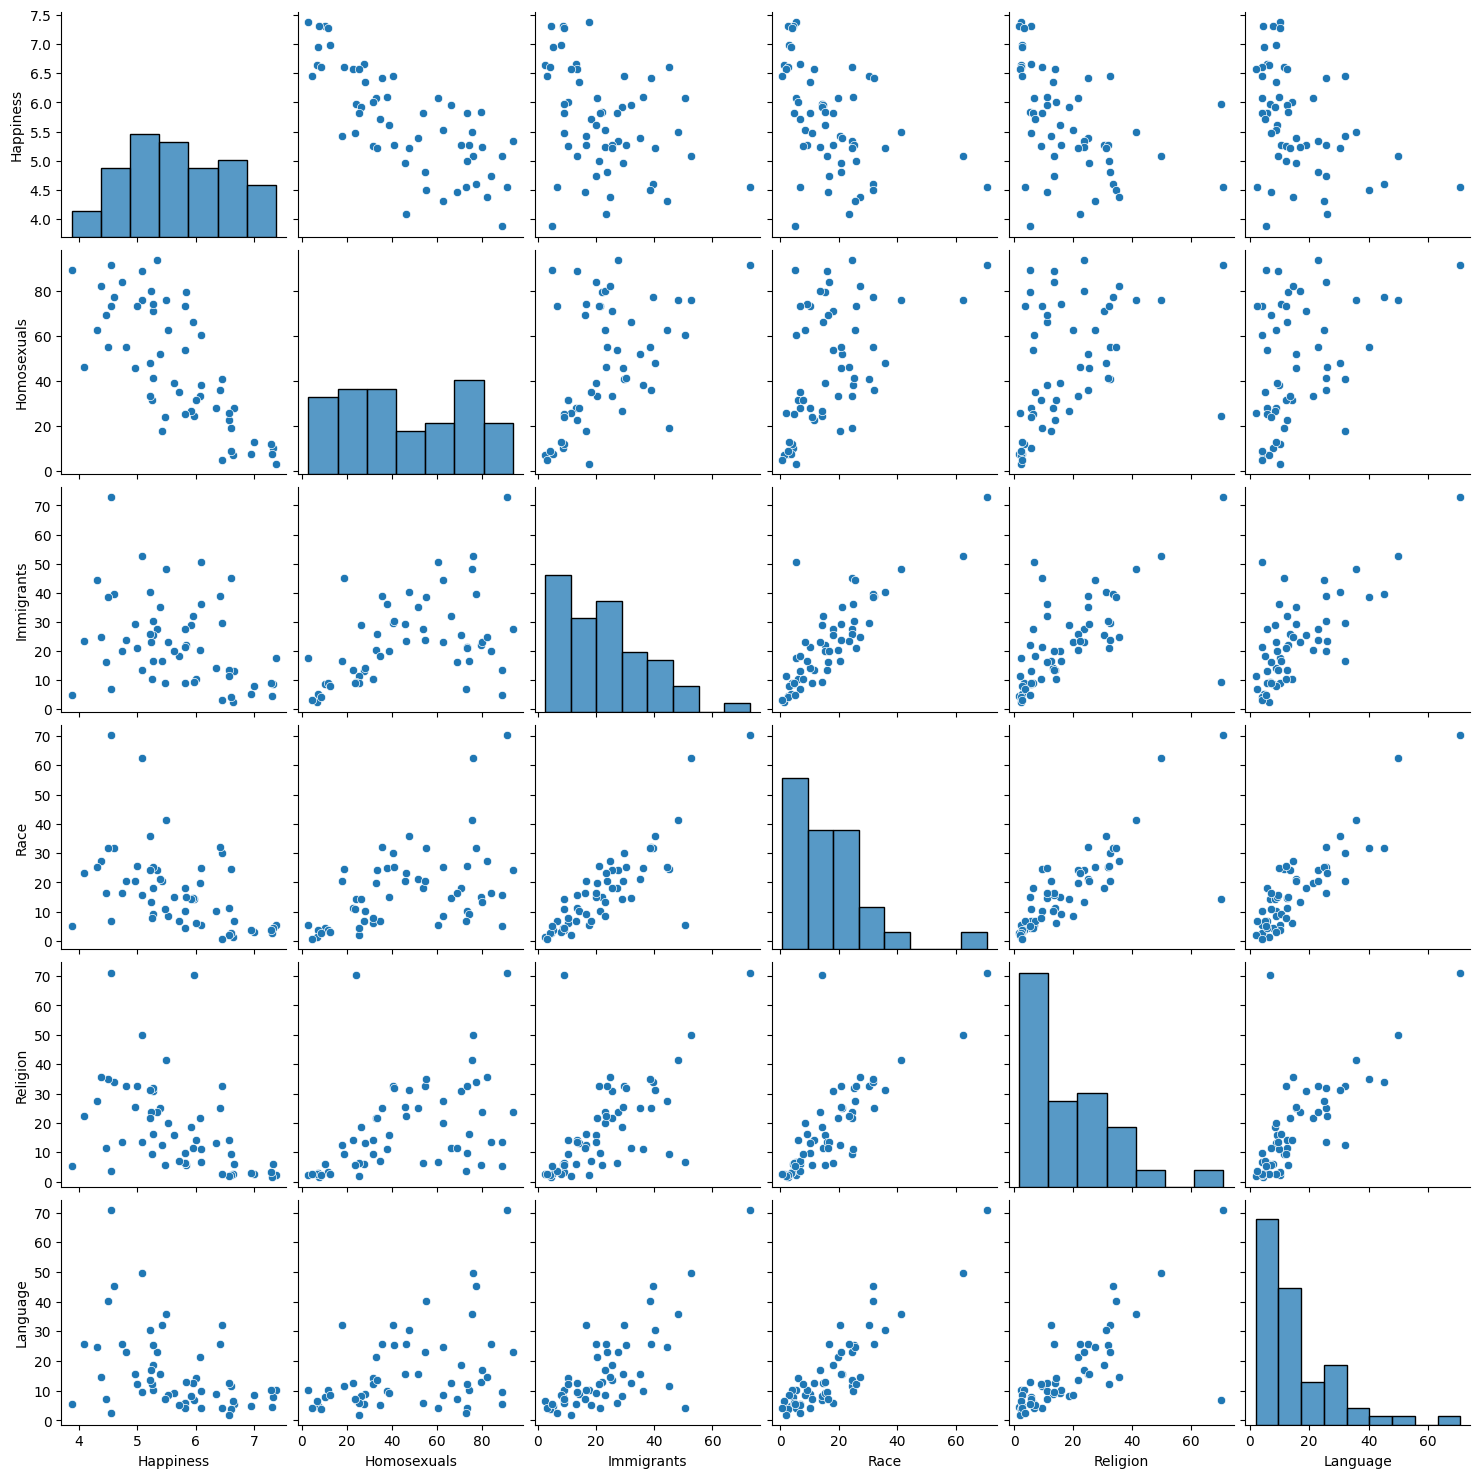


Pearson Correlation Matrix:
             Happiness  Homosexuals  Immigrants      Race  Religion  Language
Happiness     1.000000    -0.757158   -0.352847 -0.472572 -0.462492 -0.429314
Homosexuals  -0.757158     1.000000    0.473617  0.490177  0.427180  0.402089
Immigrants   -0.352847     0.473617    1.000000  0.841288  0.624333  0.730712
Race         -0.472572     0.490177    0.841288  1.000000  0.797665  0.888190
Religion     -0.462492     0.427180    0.624333  0.797665  1.000000  0.732580
Language     -0.429314     0.402089    0.730712  0.888190  0.732580  1.000000

Spearman Correlation Matrix:
             Happiness  Homosexuals  Immigrants      Race  Religion  Language
Happiness     1.000000    -0.758431   -0.376619 -0.563886 -0.585535 -0.459851
Homosexuals  -0.758431     1.000000    0.514763  0.551009  0.547912  0.411632
Immigrants   -0.376619     0.514763    1.000000  0.841564  0.706539  0.669368
Race         -0.563886     0.551009    0.841564  1.000000  0.847460  0.816524
Relig

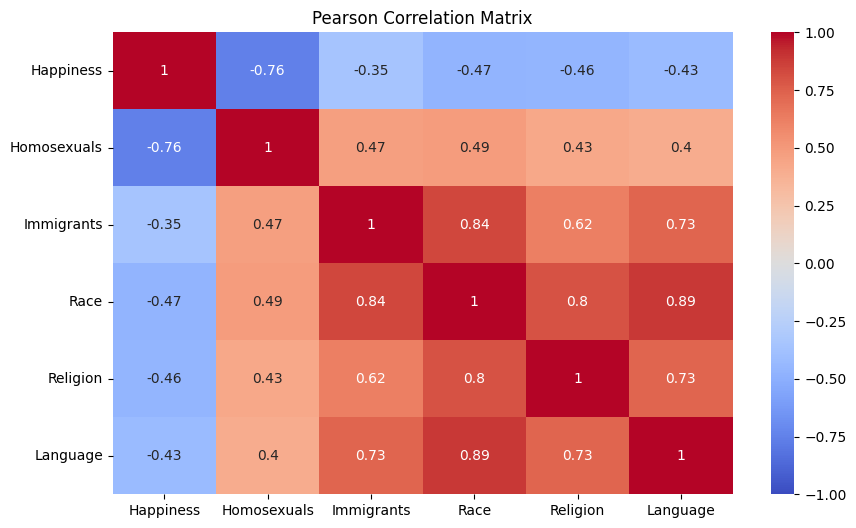

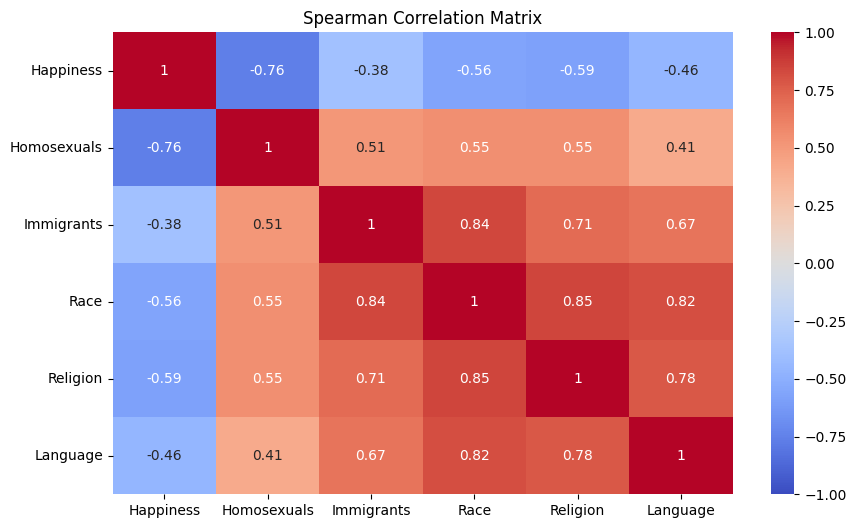


Hypothesis Testing (H₀: No correlation, Hₐ: Positive correlation between racism and happiness):

Homosexuals:
  Observed correlation = -0.7572
  Traditional p-value = 0.0000
  Permutation test p-value = 1.0000
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



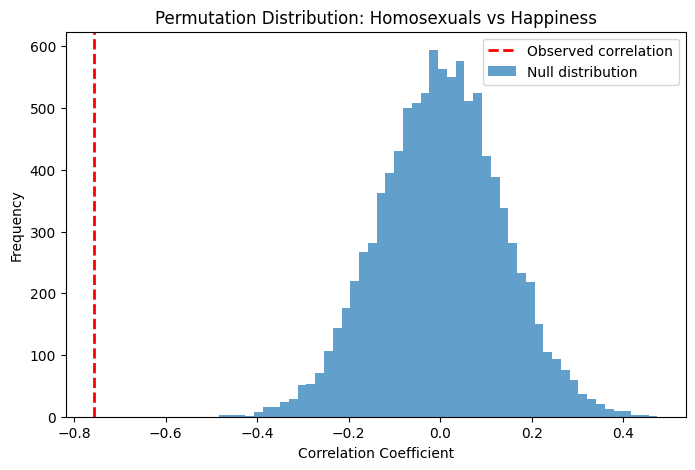

Immigrants:
  Observed correlation = -0.3528
  Traditional p-value = 0.0071
  Permutation test p-value = 0.9975
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



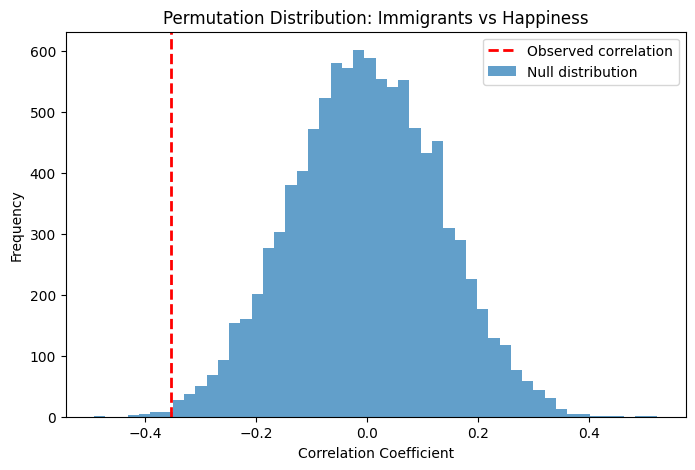

Race:
  Observed correlation = -0.4726
  Traditional p-value = 0.0002
  Permutation test p-value = 0.9999
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



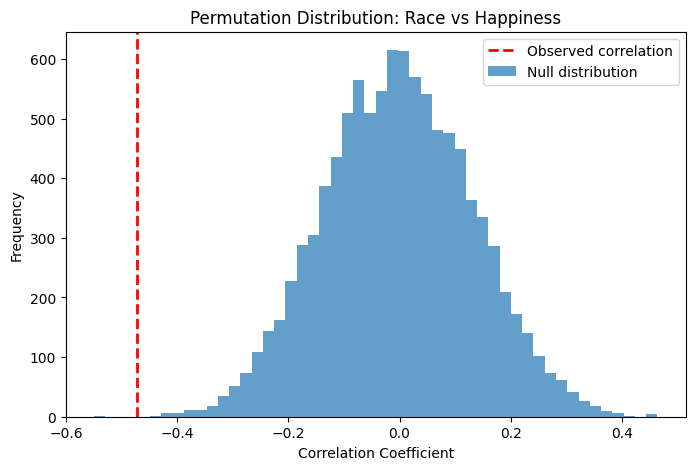

Religion:
  Observed correlation = -0.4625
  Traditional p-value = 0.0003
  Permutation test p-value = 0.9999
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



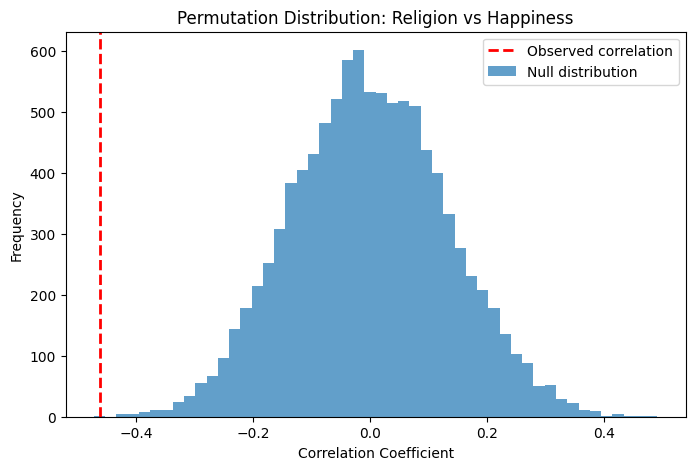

Language:
  Observed correlation = -0.4293
  Traditional p-value = 0.0009
  Permutation test p-value = 0.9997
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



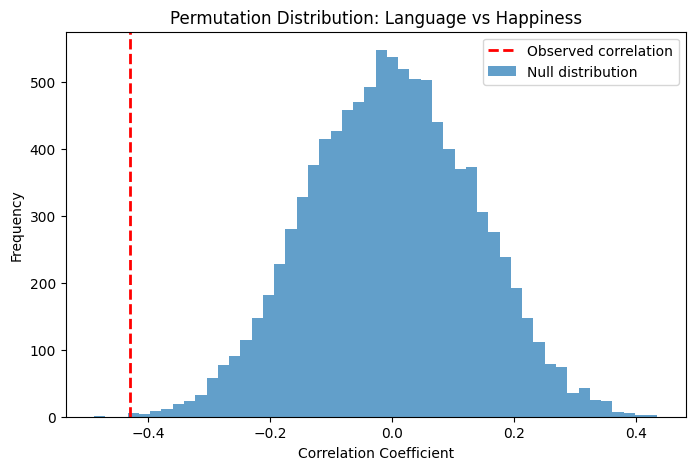

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind

# Step 1: Load Data
# Load World Happiness Index data
happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')

# Load racism-related datasets with skiprows
homosexuals_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv', skiprows=5)
immigrants_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv', skiprows=4)
race_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv', skiprows=4)
religion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv', skiprows=4)
language_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv', skiprows=4)

# Rename columns for consistency
for df in [homosexuals_df, immigrants_df, race_df, religion_df, language_df]:
    df.rename(columns={df.columns[0]: 'Country', 'Mentioned (%)': 'Mentioned'}, inplace=True)
    df['Country'] = df['Country'].str.strip()

# Step 2: Clean and Merge Data
happiness_df['Country'] = happiness_df['Country'].str.strip()
merged_df = happiness_df[['Country', 'Happiness Score']].copy()
merged_df = merged_df.merge(homosexuals_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(immigrants_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Immigrants'))
merged_df = merged_df.merge(race_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(religion_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Religion'))
merged_df = merged_df.merge(language_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Language'))

# Rename columns clearly
merged_df.columns = ['Country', 'Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

# Drop rows with missing values
merged_df = merged_df.dropna()

# Convert relevant columns to numeric (coerce errors into NaN)
for col in ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Step 3: Exploratory Data Analysis
print(merged_df.describe())

# Pairplot visualization
sns.pairplot(merged_df[['Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']])
plt.show()

# Step 4: Correlation Analysis
pearson_corr = merged_df.drop(columns='Country').corr(method='pearson')
spearman_corr = merged_df.drop(columns='Country').corr(method='spearman')

print("\nPearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Step 5: Visualize Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation Matrix")
plt.show()

# Step 6: Randomization Test for Hypothesis Testing
features = ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

# Number of permutations for randomization test
n_permutations = 10000

print("\nHypothesis Testing (H₀: No correlation, Hₐ: Positive correlation between racism and happiness):\n")

for feature in features:
    # Get observed correlation
    observed_corr, p_value_pearson = pearsonr(merged_df[feature], merged_df['Happiness'])

    # Randomization test
    permuted_corrs = []
    for i in range(n_permutations):
        # Shuffle happiness values to break any potential relationship
        permuted_happiness = np.random.permutation(merged_df['Happiness'])
        perm_corr, _ = pearsonr(merged_df[feature], permuted_happiness)
        permuted_corrs.append(perm_corr)

    # Calculate p-value from permutation test
    # For one-sided test (Hₐ: positive correlation),
    # count values greater than or equal to observed
    p_value_perm = np.mean([corr >= observed_corr for corr in permuted_corrs])

    print(f"{feature}:")
    print(f"  Observed correlation = {observed_corr:.4f}")
    print(f"  Traditional p-value = {p_value_pearson:.4f}")
    print(f"  Permutation test p-value = {p_value_perm:.4f}")

    # Decision based on permutation test p-value
    if p_value_pearson < 0.05:
        if observed_corr > 0:
            print("  ✅ H₀ rejected: Significant positive correlation between this variable and happiness.")
            print("     This supports your alternative hypothesis.")
        else:
            print("  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).")
    else:
        print("  🔸 H₀ not rejected: No significant evidence for correlation.")

    print()

    # Plot histogram of permutation distribution
    plt.figure(figsize=(8, 5))
    plt.hist(permuted_corrs, bins=50, alpha=0.7)
    plt.axvline(observed_corr, color='red', linestyle='--', linewidth=2)
    plt.title(f'Permutation Distribution: {feature} vs Happiness')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Frequency')
    plt.legend(['Observed correlation', 'Null distribution'])
    plt.savefig(f'permutation_test_{feature}.png')
    plt.show()

In [ ]:
import pandas as pd

# Save the complete dataset as a CSV file
output_path = '/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv'
merged_df.to_csv(output_path, index=False)

print(f"Dataset successfully saved to: {output_path}")


Dataset successfully saved to: /content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv


In [ ]:
import pandas as pd

# Define file paths for all datasets
datasets = {
    "Happiness": "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv",
    "Homosexuals": "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv",
    "Immigrants": "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv",
    "Race": "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv",
    "Religion": "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv",
    "Language": "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv"
}

# Load Happiness dataset
happiness_df = pd.read_csv(datasets["Happiness"])
happiness_df.rename(columns={"Happiness Score": "Happiness"}, inplace=True)
happiness_df["Country"] = happiness_df["Country"].str.strip()

# Merge racism-related datasets
merged_df = happiness_df[["Country", "Happiness"]].copy()

for name, file in datasets.items():
    if name != "Happiness":  # Skip Happiness dataset
        df = pd.read_csv(file, skiprows=4 if name != "Homosexuals" else 5)

        # Extract relevant columns (Country, Mentioned %)
        df.rename(columns={df.columns[0]: "Country", "Mentioned": name}, inplace=True)
        df["Country"] = df["Country"].str.strip()

        # Merge with main dataframe
        merged_df = merged_df.merge(df[["Country", name]], on="Country", how="left")

# Fill missing values with 0 for filtering
merged_df.fillna(0, inplace=True)

# Step 4: Remove rows where all racism indices are 0
indices = ["Homosexuals", "Immigrants", "Race", "Religion", "Language"]
merged_df = merged_df[~(merged_df[indices] == 0).all(axis=1)]

# Save final dataset
merged_df.to_csv("/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Merged_Happiness_Racism.csv", index=False)
print("✅ Merged dataset saved successfully!")


✅ Merged dataset saved successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features (X) and target variable (y)
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]  # Predictor variables
y = (df['Happiness'] > df['Happiness'].median()).astype(int)  # Binary classification based on median happiness

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train k-NN model
k = 5  # You can experiment with different values
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of k-NN model: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy of k-NN model: 0.8333
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



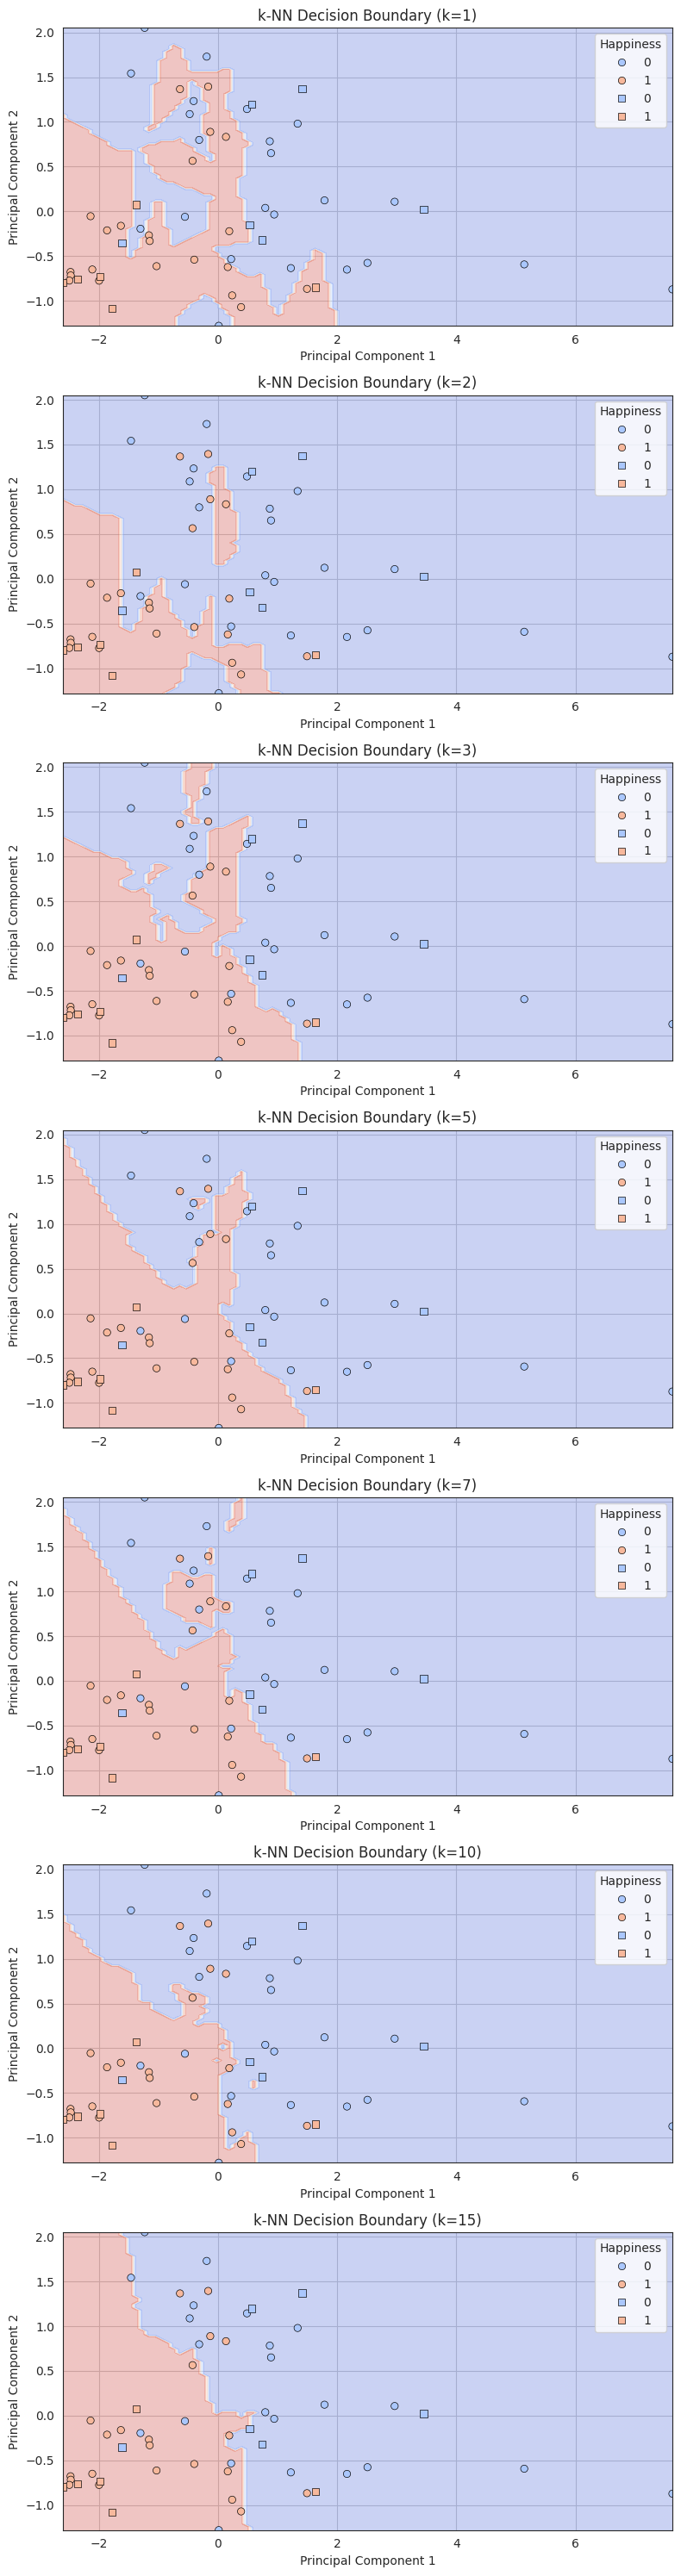


Bias-Variance Tradeoff Data:
    k      Bias  Variance  Error Rate
0   1  0.000000  0.166667    0.166667
1   2  0.177778  0.072222    0.250000
2   3  0.177778 -0.011111    0.166667
3   5  0.177778 -0.011111    0.166667
4   7  0.222222 -0.055556    0.166667
5  10  0.222222 -0.055556    0.166667
6  15  0.244444  0.005556    0.250000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use a built-in font for compatibility
plt.rcParams["font.family"] = "sans-serif"

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = (df['Happiness'] > df['Happiness'].median()).astype(int)  # Binary classification

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Experiment with different k values
k_values = [1,2,3, 5, 7, 10, 15]
fig, axes = plt.subplots(len(k_values), 1, figsize=(8, 30))  # Vertically stacked plots

bias_variance_data = []

for i, k in enumerate(k_values):
    # Fit k-NN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Compute bias and variance estimation
    bias = 1 - train_accuracy  # Approximate bias (how far predictions deviate)
    variance = train_accuracy - test_accuracy  # Approximate variance (sensitivity to test data)
    error = 1 - test_accuracy  # Overall error rate

    bias_variance_data.append((k, bias, variance, error))

    # Create mesh grid for decision boundary visualization
    xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100),
                         np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='black', ax=axes[i])
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='coolwarm', marker='s', edgecolor='black', ax=axes[i])

    axes[i].set_title(f"k-NN Decision Boundary (k={k})")
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Display Bias, Variance, and Error Rates
bias_variance_df = pd.DataFrame(bias_variance_data, columns=["k", "Bias", "Variance", "Error Rate"])
print("\nBias-Variance Tradeoff Data:")
print(bias_variance_df)



Bias-Variance Tradeoff Data:
   k      Bias  Variance  Error Rate
0  3  0.177778 -0.011111    0.166667


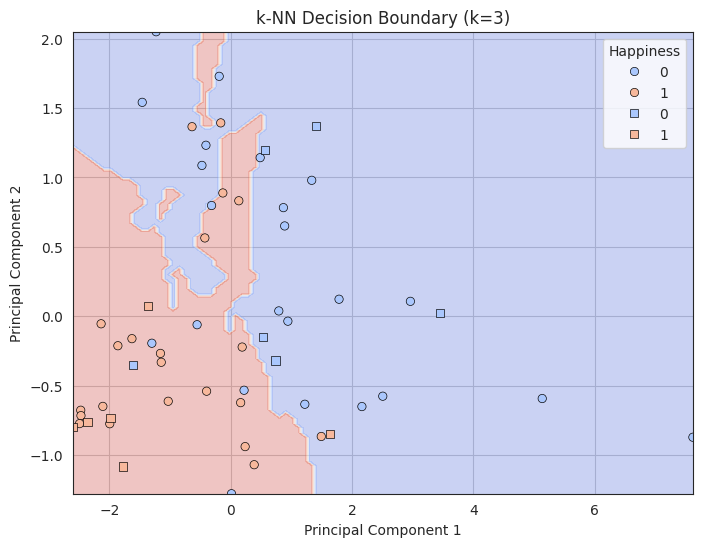

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use a built-in font for compatibility
plt.rcParams["font.family"] = "sans-serif"

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = (df['Happiness'] > df['Happiness'].median()).astype(int)  # Binary classification

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Set k=5 for k-NN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict and calculate accuracy
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute bias and variance estimation
bias = 1 - train_accuracy  # Approximate bias (how far predictions deviate)
variance = train_accuracy - test_accuracy  # Approximate variance (sensitivity to test data)
error = 1 - test_accuracy  # Overall error rate

# Display bias-variance tradeoff
bias_variance_df = pd.DataFrame([[k, bias, variance, error]], columns=["k", "Bias", "Variance", "Error Rate"])
print("\nBias-Variance Tradeoff Data:")
print(bias_variance_df)

# Create mesh grid for decision boundary visualization
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary for k=5
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='black')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='coolwarm', marker='s', edgecolor='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"k-NN Decision Boundary (k={k})")
plt.grid(True)
plt.show()


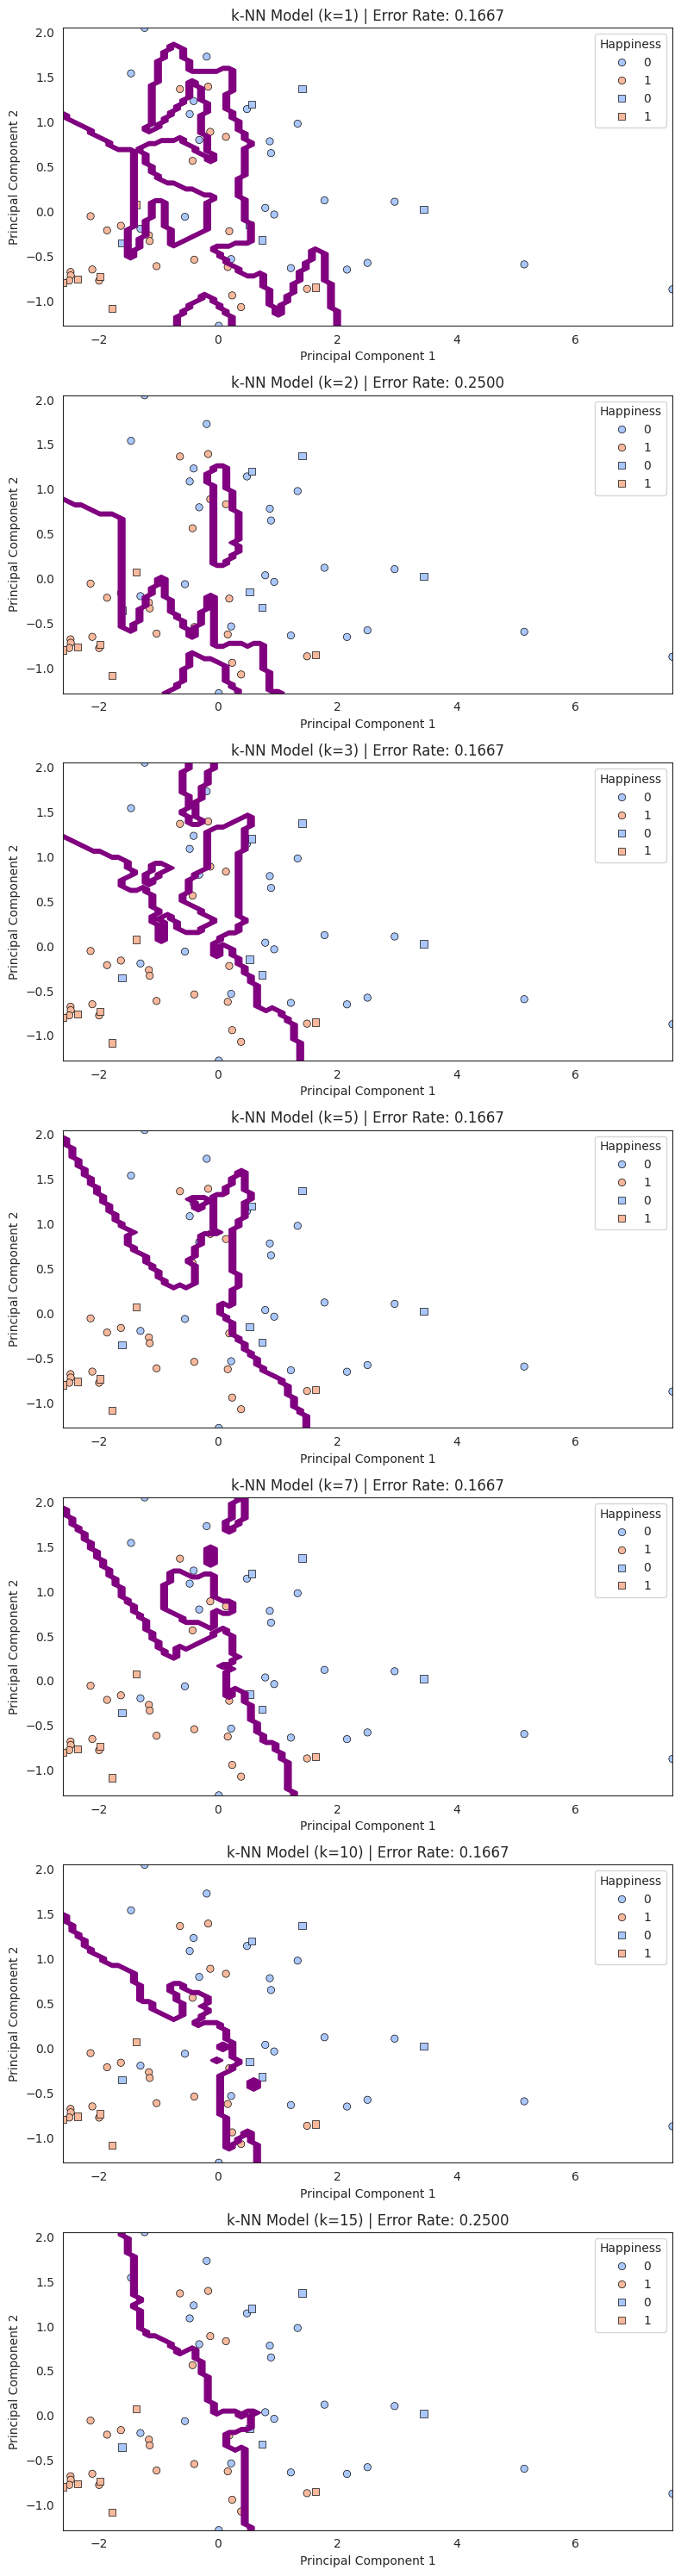


Error Rates for Different k-values:
    k  Error Rate
0   1    0.166667
1   2    0.250000
2   3    0.166667
3   5    0.166667
4   7    0.166667
5  10    0.166667
6  15    0.250000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set a clean white background
sns.set_style("white")

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = (df['Happiness'] > df['Happiness'].median()).astype(int)  # Binary classification

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Experiment with different k values
k_values = [1,2,3, 5, 7, 10, 15]
fig, axes = plt.subplots(len(k_values), 1, figsize=(8, 30))  # Vertically stacked plots

error_rates = []  # Store error rates for different k-values

for i, k in enumerate(k_values):
    # Fit k-NN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict and compute error rate
    y_test_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_test_pred)
    error_rates.append((k, error_rate))

    # Generate prediction grid
    xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100),
                         np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary as a single purple line
    axes[i].contour(xx, yy, Z, colors='purple', linewidths=2)  # Single clean boundary line

    # Scatterplot for training/testing data
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='black', ax=axes[i])
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='coolwarm', marker='s', edgecolor='black', ax=axes[i])

    # Labels and aesthetics
    axes[i].set_title(f"k-NN Model (k={k}) | Error Rate: {error_rate:.4f}", fontsize=12)
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")
    axes[i].grid(False)  # Removes distracting grid lines for a clean look

plt.tight_layout()
plt.show()

# Display error rates for different k values
error_df = pd.DataFrame(error_rates, columns=["k", "Error Rate"])
print("\nError Rates for Different k-values:")
print(error_df)


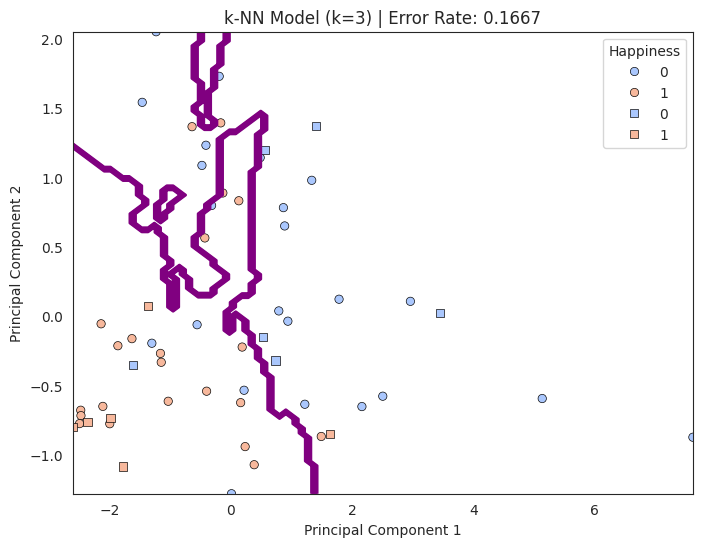


Error Rate for k=3: 0.1667


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set a clean white background
sns.set_style("white")

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = (df['Happiness'] > df['Happiness'].median()).astype(int)  # Binary classification

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Set k=5 for k-NN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict and compute error rate
y_test_pred = knn.predict(X_test)
error_rate = 1 - accuracy_score(y_test, y_test_pred)

# Generate prediction grid
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary for k=5
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, colors='purple', linewidths=2)  # Clean boundary line

# Scatterplot for training/testing data
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='black')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='coolwarm', marker='s', edgecolor='black')

# Labels and aesthetics
plt.title(f"k-NN Model (k={k}) | Error Rate: {error_rate:.4f}", fontsize=12)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(False)  # Removes distracting grid lines for a clean look
plt.show()

# Display error rate for k=5
print(f"\nError Rate for k={k}: {error_rate:.4f}")



Best k: 3 (Lowest MSE: 0.3452)


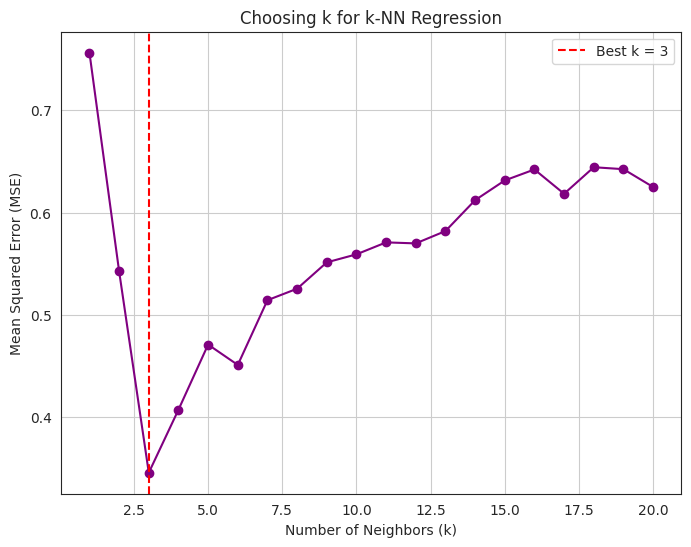

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = df['Happiness']  # Regression target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Range of k values to test
k_values = list(range(1, 21))  # Testing k from 1 to 20
error_rates = []

for k in k_values:
    # Fit k-NN regression model
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)

    # Predict and compute error (MSE)
    y_test_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    error_rates.append((k, mse))

# Convert error data to DataFrame
error_df = pd.DataFrame(error_rates, columns=["k", "Mean Squared Error"])

# Find the best k (lowest MSE)
best_k = error_df.loc[error_df["Mean Squared Error"].idxmin(), "k"]
best_mse = error_df["Mean Squared Error"].min()

print(f"\nBest k: {best_k} (Lowest MSE: {best_mse:.4f})")

# Plot Error vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, error_df["Mean Squared Error"], marker='o', linestyle='-', color='purple')
plt.axvline(best_k, color='red', linestyle='dashed', label=f"Best k = {best_k}")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Choosing k for k-NN Regression")
plt.legend()
plt.grid(True)
plt.show()


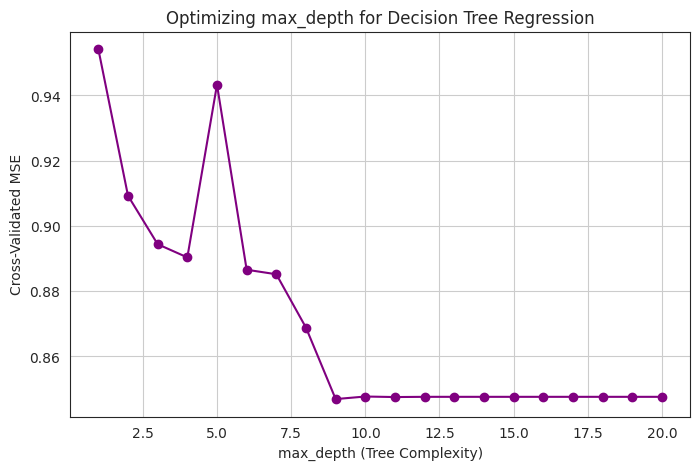

Best max_depth: 9


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target variable
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = df['Happiness']  # Continuous target (happiness score)

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Experiment with different max_depth values
depths = list(range(1, 21))
cv_scores = []

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=1)
    scores = cross_val_score(tree, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())  # Convert from negative MSE

# Plot max_depth vs MSE to find the optimal tree depth
plt.figure(figsize=(8, 5))
plt.plot(depths, cv_scores, marker='o', color='purple')
plt.xlabel("max_depth (Tree Complexity)")
plt.ylabel("Cross-Validated MSE")
plt.title("Optimizing max_depth for Decision Tree Regression")
plt.grid(True)
plt.show()

# Find the best depth
best_depth = depths[np.argmin(cv_scores)]
print(f"Best max_depth: {best_depth}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target variable
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = df['Happiness']  # Continuous target (happiness score)

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree using the best depth found
best_depth = 9  # Update based on tuning results
tree_model = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
tree_model.fit(X_train, y_train)

# Adjust figure size dynamically based on tree depth to ensure spacing at lower levels
num_leaves = sum(tree_model.tree_.children_left == -1)  # Count number of leaf nodes
fig_width = max(22, num_leaves * 2.5)  # Scale width based on leaf count

plt.figure(figsize=(fig_width, 18), dpi=300)  # Wider figure to fit all nodes
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.title(f"Decision Tree Regression (max_depth={best_depth})", fontsize=16)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target variable
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = df['Happiness']  # Continuous target (happiness score)

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define hyperparameter ranges
depths = [3, 5,9,2,11,12, 10, 15]
estimators = [10, 50, 100]
results = {}

# Perform Random Forest Regression with different depth and estimators
for d in depths:
    for n in estimators:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        score = cross_val_score(rf, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean()
        results[(d, n)] = -score  # Convert negative MSE back to positive for interpretation

# Find best combination
best_params = min(results, key=results.get)
print(f"Best max_depth: {best_params[0]}, Best n_estimators: {best_params[1]}")
print(f"Best CV MSE: {results[best_params]:.4f}")


Best max_depth: 9, Best n_estimators: 100
Best CV MSE: 0.7588


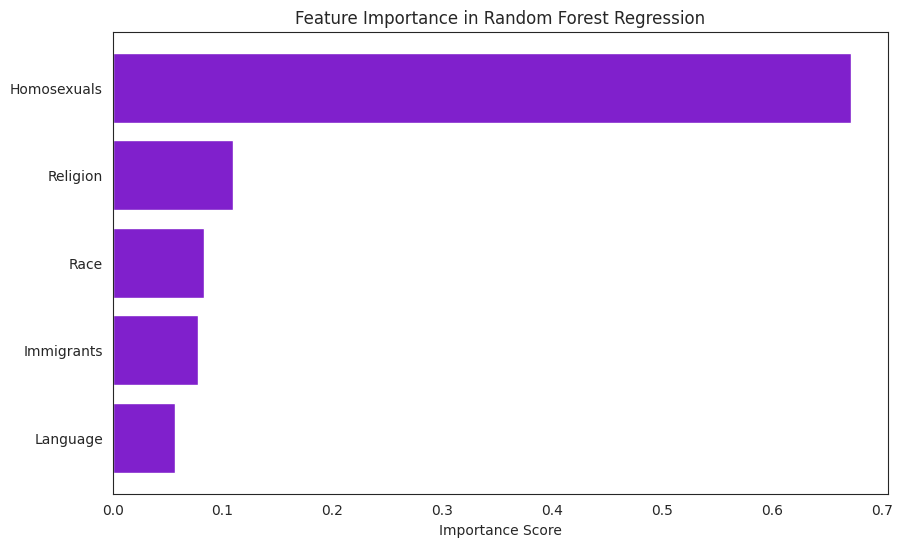

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Initialize Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fit the model
rf.fit(X_scaled, y)  # This step is missing in your code!

# Get feature importance scores
feature_importance = rf.feature_importances_
features = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importance[sorted_indices], color='#8020CC')
plt.xlabel("Importance Score")
plt.title("Feature Importance in Random Forest Regression")
plt.gca().invert_yaxis()
plt.show()



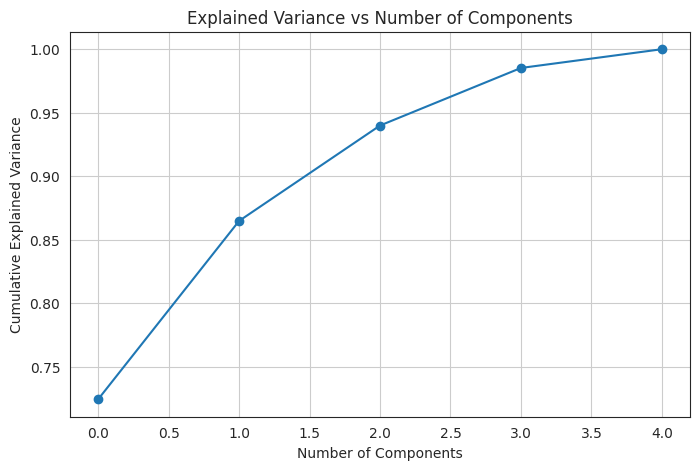

Optimal Number of PCA Components: 4
Random Forest with PCA - CV MSE: 0.3768


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features and target variable
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]
y = df['Happiness']  # Continuous target (happiness score)

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance to decide number of components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()

# Select optimal number of components (e.g., where variance > 95%)
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1
print(f"Optimal Number of PCA Components: {optimal_components}")

# Reduce dimensionality with optimal PCA components
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest on PCA-transformed features
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model performance
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Random Forest with PCA - CV MSE: {-score:.4f}")


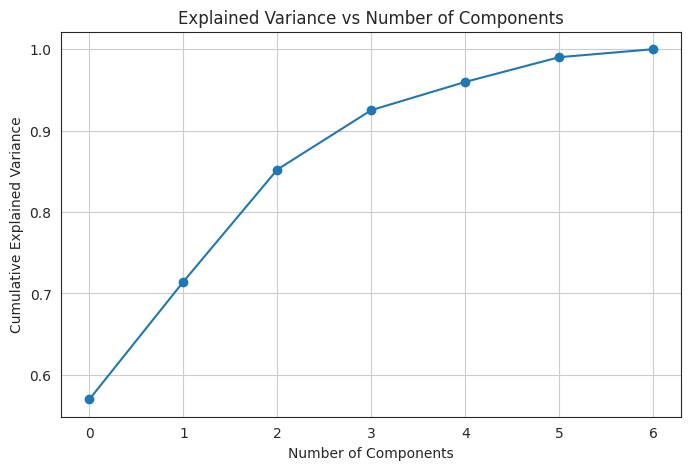

Optimal Number of PCA Components: 5
Random Forest with PCA - CV MSE: 0.4128


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv')

# Define features (Adding GDP & Freedom)
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language', 'GDP', 'Freedom']]
y = df['Happiness']  # Continuous target (happiness score)

# Normalize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance to decide number of components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()

# Select optimal number of components (e.g., where variance > 95%)
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1
print(f"Optimal Number of PCA Components: {optimal_components}")

# Reduce dimensionality with optimal PCA components
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest on PCA-transformed features
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model performance
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Random Forest with PCA - CV MSE: {-score:.4f}")


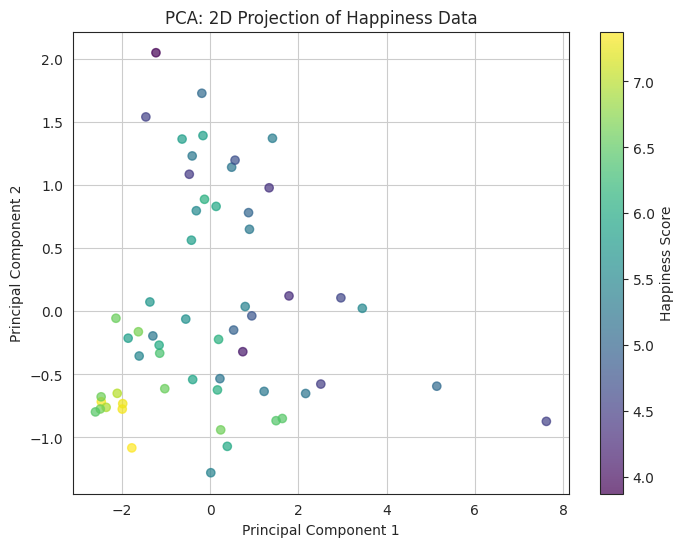

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot the PCA projection with happiness color map
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: 2D Projection of Happiness Data")
plt.colorbar(label="Happiness Score")
plt.grid(True)
plt.show()


Optimal Number of Clusters (Elbow Method): 2
Optimal Number of Clusters (Silhouette Score): 7
Final Optimal k: 2


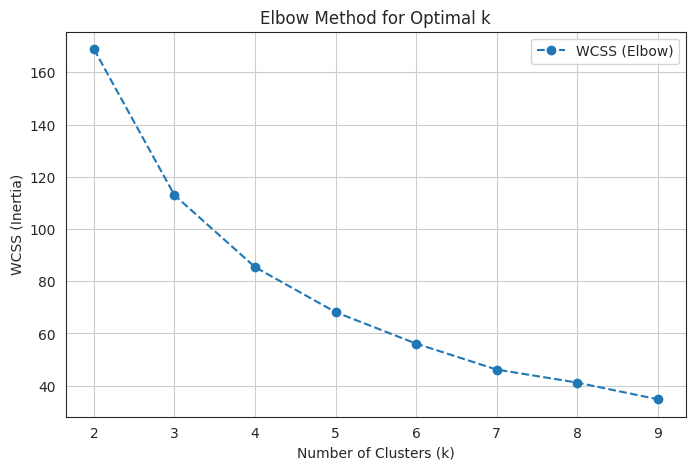

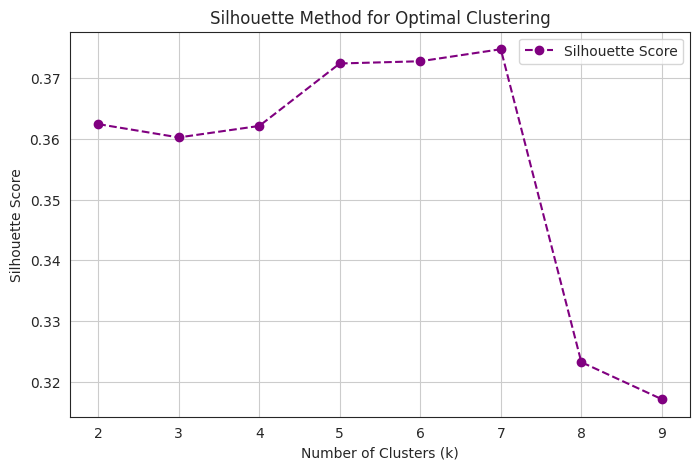

Clustering applied. The dataset now contains the assigned cluster labels!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features for clustering
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute WCSS for Elbow Method
wcss = []
sil_scores = []
k_range = range(2, 10)  # Start from k=2 (k=1 has no separation)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # Save WCSS (Elbow Method)
    wcss.append(kmeans.inertia_)

    # Save Silhouette Score
    sil_scores.append(silhouette_score(X_scaled, labels))

# Find optimal k using the Elbow Method (where WCSS drop slows)
optimal_k_elbow = np.argmin(np.diff(wcss)) + 2  # +2 to align with k_range

# Find optimal k using Silhouette Score (highest score)
optimal_k_silhouette = k_range[np.argmax(sil_scores)]

# Determine final k (choose the most stable one)
optimal_k = optimal_k_silhouette if abs(optimal_k_elbow - optimal_k_silhouette) <= 2 else optimal_k_elbow
print(f"Optimal Number of Clusters (Elbow Method): {optimal_k_elbow}")
print(f"Optimal Number of Clusters (Silhouette Score): {optimal_k_silhouette}")
print(f"Final Optimal k: {optimal_k}")

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', label="WCSS (Elbow)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='o', linestyle='--', color='purple', label="Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal Clustering")
plt.grid(True)
plt.legend()
plt.show()

# Apply K-Means with the chosen optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("Clustering applied. The dataset now contains the assigned cluster labels!")


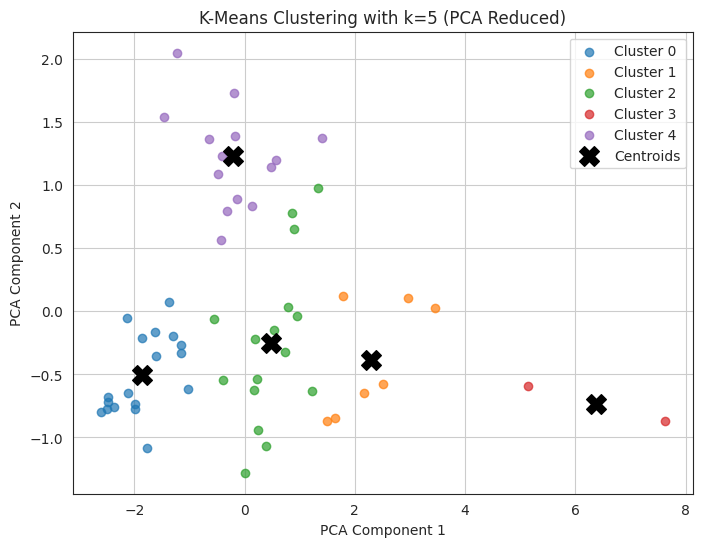

In [ ]:
# Fit K-Means with optimal k=7
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Reduce dimensions for visualization using PCA
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot clusters in PCA space
plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    plt.scatter(X_2d[cluster_labels == cluster, 0],
                X_2d[cluster_labels == cluster, 1],
                label=f"Cluster {cluster}", alpha=0.7)

# Plot centroids in PCA space
plt.scatter(pca_2d.transform(kmeans.cluster_centers_)[:, 0],
            pca_2d.transform(kmeans.cluster_centers_)[:, 1],
            s=200, marker='X', label='Centroids', c='black')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering with k=5 (PCA Reduced)")
plt.legend()
plt.grid(True)
plt.show()


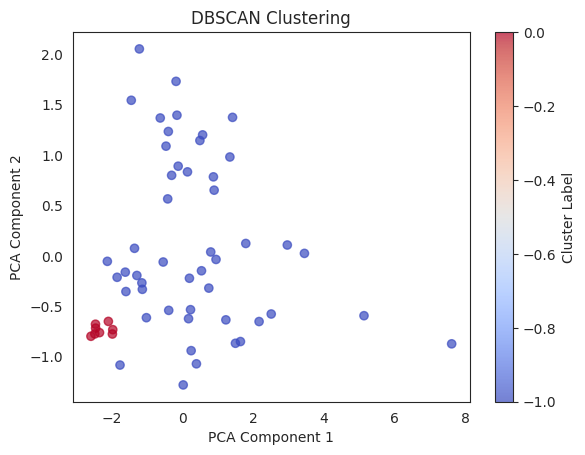

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters for your data
cluster_labels = dbscan.fit_predict(X_scaled)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='coolwarm', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Label")
plt.show()


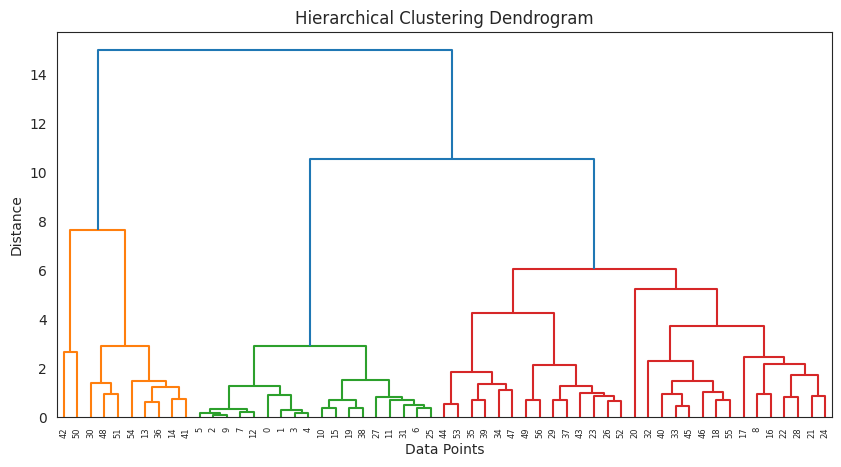

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


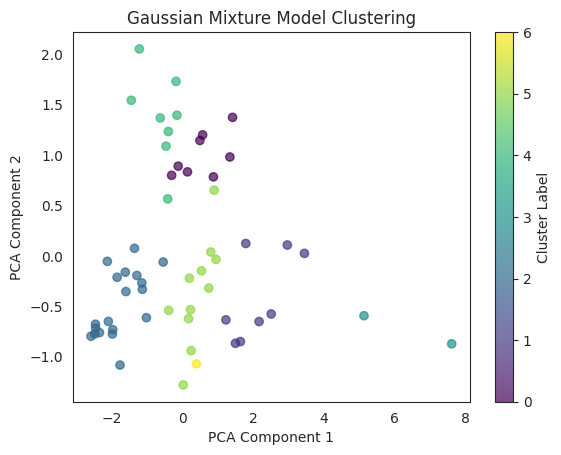

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=7, random_state=42)  # Use optimal k
cluster_labels = gmm.fit_predict(X_scaled)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Gaussian Mixture Model Clustering")
plt.colorbar(label="Cluster Label")
plt.show()


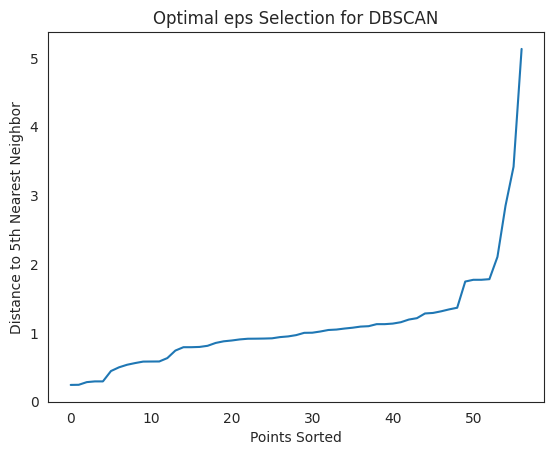

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Find optimal eps using k-nearest neighbors distance
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Plot sorted k-distance graph to identify best eps
plt.plot(np.sort(distances[:, 4]))  # 4 corresponds to n_neighbors - 1
plt.xlabel("Points Sorted")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.title("Optimal eps Selection for DBSCAN")
plt.show()


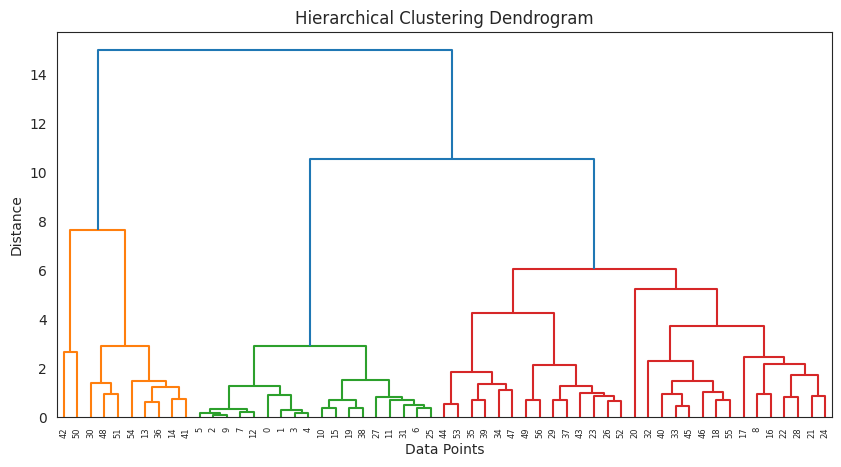

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


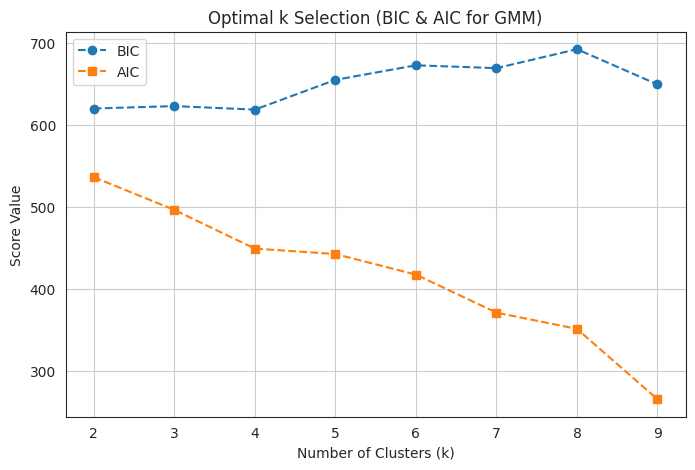

In [ ]:
from sklearn.mixture import GaussianMixture

bic_scores = []
aic_scores = []
for k in range(2, 10):  # Test multiple k values
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

# Plot BIC and AIC to find optimal k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), bic_scores, marker='o', linestyle='--', label="BIC")
plt.plot(range(2, 10), aic_scores, marker='s', linestyle='--', label="AIC")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score Value")
plt.title("Optimal k Selection (BIC & AIC for GMM)")
plt.legend()
plt.grid(True)
plt.show()


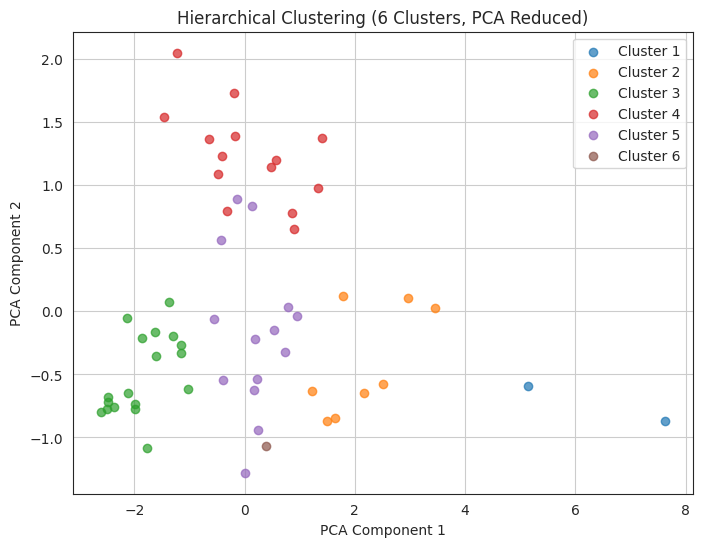

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(1, 7):  # Hierarchical clustering labels start from 1
    plt.scatter(X_2d[cluster_labels == cluster, 0], X_2d[cluster_labels == cluster, 1], label=f"Cluster {cluster}", alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hierarchical Clustering (6 Clusters, PCA Reduced)")
plt.legend()
plt.grid(True)
plt.show()


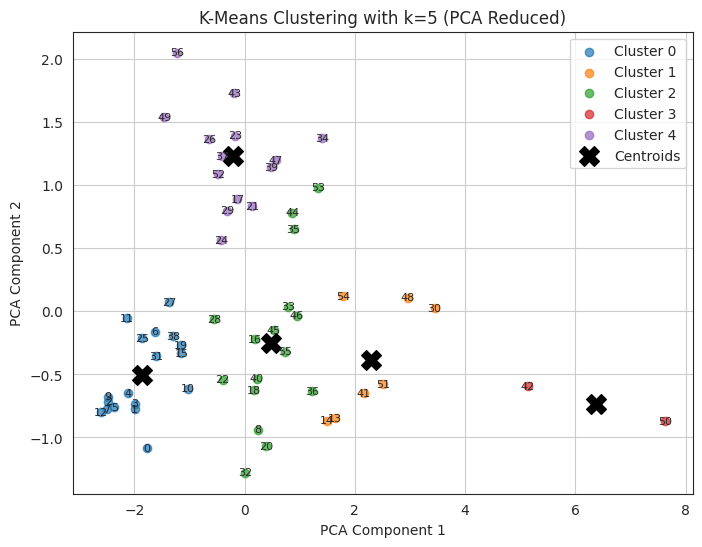

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reduce dimensions for visualization using PCA
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Fit K-Means with best k (adjusted for optimal clusters)
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Plot clusters in PCA space with numbered points
plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    cluster_points = (cluster_labels == cluster)
    plt.scatter(X_2d[cluster_points, 0], X_2d[cluster_points, 1], label=f"Cluster {cluster}", alpha=0.7)

    # Add numerical labels for each point
    for i in range(len(X_2d)):
        if cluster_labels[i] == cluster:
            plt.text(X_2d[i, 0], X_2d[i, 1], str(i), fontsize=8, ha='center', va='center')

# Plot centroids in PCA space
plt.scatter(pca_2d.transform(kmeans.cluster_centers_)[:, 0],
            pca_2d.transform(kmeans.cluster_centers_)[:, 1],
            s=200, marker='X', label='Centroids', c='black')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering with k={best_k} (PCA Reduced)")
plt.legend()
plt.grid(True)
plt.show()


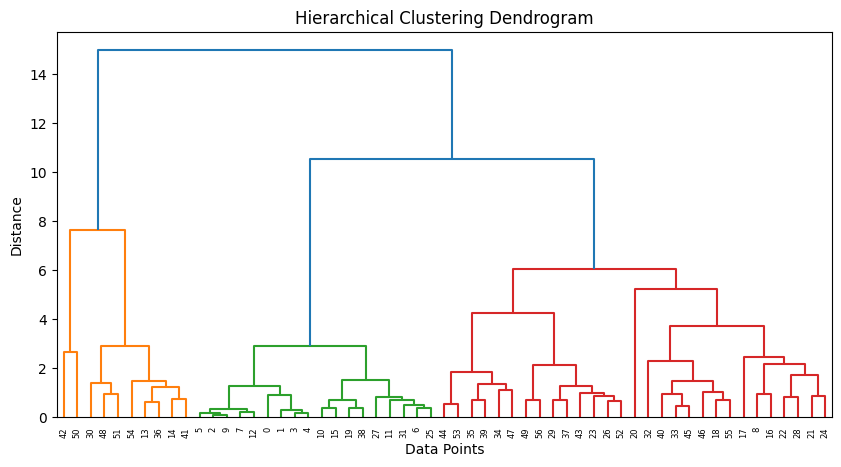

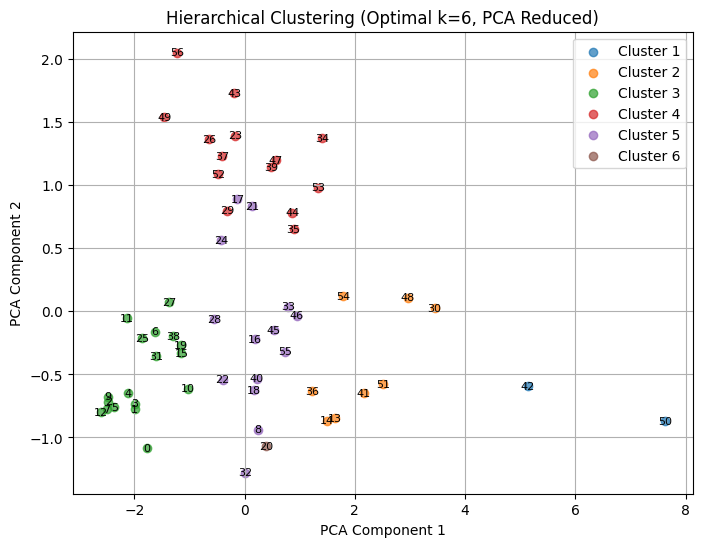

Cluster_HC
3    18
5    14
4    14
2     8
1     2
6     1
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')

# Define features for clustering
X = df[['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']]

# Normalize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute hierarchical clustering linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram to visualize hierarchy
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Choose optimal cluster count (cut dendrogram at 6 clusters)
optimal_k = 6
cluster_labels = fcluster(linkage_matrix, t=optimal_k, criterion='maxclust')
df['Cluster_HC'] = cluster_labels  # Add hierarchical cluster labels to dataset

# Reduce dimensions for visualization using PCA
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot Hierarchical Clustering results with numbered data points
plt.figure(figsize=(8, 6))
for cluster in range(1, optimal_k + 1):  # Hierarchical clusters start at 1
    cluster_points = (cluster_labels == cluster)
    plt.scatter(X_2d[cluster_points, 0], X_2d[cluster_points, 1], label=f"Cluster {cluster}", alpha=0.7)

    # Add numerical labels for each point
    for i in range(len(X_2d)):
        if cluster_labels[i] == cluster:
            plt.text(X_2d[i, 0], X_2d[i, 1], str(i), fontsize=8, ha='center', va='center')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Hierarchical Clustering (Optimal k={optimal_k}, PCA Reduced)")
plt.legend()
plt.grid(True)
plt.show()

# Check cluster distribution
print(df['Cluster_HC'].value_counts())


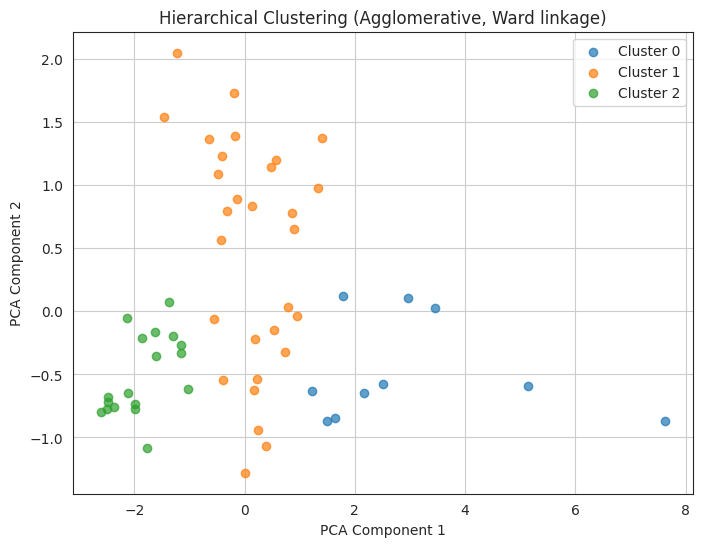

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Set number of clusters
n_clusters = 3

agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_clust.fit_predict(X_scaled)

# Visualize in PCA 2D space
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(X_2d[agg_labels == cluster, 0],
                X_2d[agg_labels == cluster, 1],
                label=f"Cluster {cluster}", alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hierarchical Clustering (Agglomerative, Ward linkage)")
plt.legend()
plt.grid(True)
plt.show()

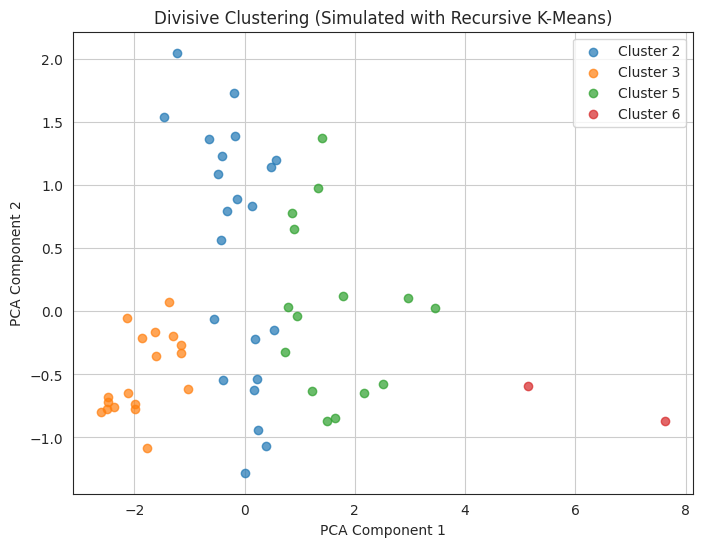

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Use PCA-reduced 2D data for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Initialize cluster labels
n = len(X_2d)
cluster_labels = np.zeros(n, dtype=int)  # All points start in one cluster
next_label = 1  # Track next available cluster label

def divisive_kmeans(X, indices, depth=0, max_depth=2):
    """Recursive K-Means to perform divisive clustering."""
    global next_label
    if depth == max_depth or len(indices) <= 2:
        return  # Stop recursion when max depth is reached or too few points remain

    # Apply K-Means (splitting into 2 subclusters per iteration)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    split_labels = kmeans.fit_predict(X[indices])

    # Assign unique cluster labels to subclusters and continue recursion
    for split_val in [0, 1]:
        sub_indices = indices[split_labels == split_val]
        cluster_labels[sub_indices] = next_label
        next_label += 1
        divisive_kmeans(X, sub_indices, depth + 1, max_depth)

# Start recursion with all data points
divisive_kmeans(X_2d, np.arange(n))

# Plot divisive clustering results
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    plt.scatter(X_2d[cluster_labels == label, 0], X_2d[cluster_labels == label, 1], label=f"Cluster {label}", alpha=0.7)

# Title and labels
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Divisive Clustering (Simulated with Recursive K-Means)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from google.colab import drive

# Load datasets
df_main = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Complete_Data.csv')
df_freedom = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Freedom_Data.csv')

# Clean column names
df_main.columns = df_main.columns.str.strip()
df_freedom.columns = df_freedom.columns.str.strip()

# Rename 'Country' column if needed
if "Freedom in the World 2013-2025 Raw Data" in df_freedom.columns:
    df_freedom.rename(columns={"Freedom in the World 2013-2025 Raw Data": "Country"}, inplace=True)

# Merge datasets on 'Country'
df_merged = df_main.merge(df_freedom, on='Country', how='left')

# Save file to Google Drive
output_path = "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv"
df_merged.to_csv(output_path, index=False)

print(f"Dataset successfully saved to: {output_path}")


Dataset successfully saved to: /content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv


In [ ]:
import pandas as pd

# Load the bigger dataset
file_path = "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv"
df = pd.read_csv(file_path)

# Rename the last column to 'Freedom'
df.rename(columns={df.columns[-1]: "Freedom"}, inplace=True)

# Save updated file
df.to_csv(file_path, index=False)
print(f"Updated dataset saved at: {file_path}")


Updated dataset saved at: /content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load main dataset (bigger data)
file_path = "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv"
df_main = pd.read_csv(file_path)

# Load GDP dataset
gdp_file = "/content/drive/My Drive/Colab Notebooks/DSA 210/Project/GDP_Data.csv"
df_gdp = pd.read_csv(gdp_file)

# Clean column names
df_main.columns = df_main.columns.str.strip()
df_gdp.columns = df_gdp.columns.str.strip()

# Standardize country names for correct merging
df_main["Country"] = df_main["Country"].str.strip().str.lower()
df_gdp["Country Name"] = df_gdp["Country Name"].str.strip().str.lower()

# Select only 'Country Name' and 'Value' from GDP data
df_gdp = df_gdp[["Country Name", "Value"]]

# Merge GDP data into bigger dataset
df_merged = df_main.merge(df_gdp, left_on="Country", right_on="Country Name", how="left")

# Drop extra 'Country Name' column after merging
df_merged.drop(columns=["Country Name"], inplace=True)

# Rename 'Value' column to 'GDP'
df_merged.rename(columns={"Value": "GDP"}, inplace=True)

# Save updated dataset
df_merged.to_csv(file_path, index=False)
print(f"Updated dataset saved at: {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Updated dataset saved at: /content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv


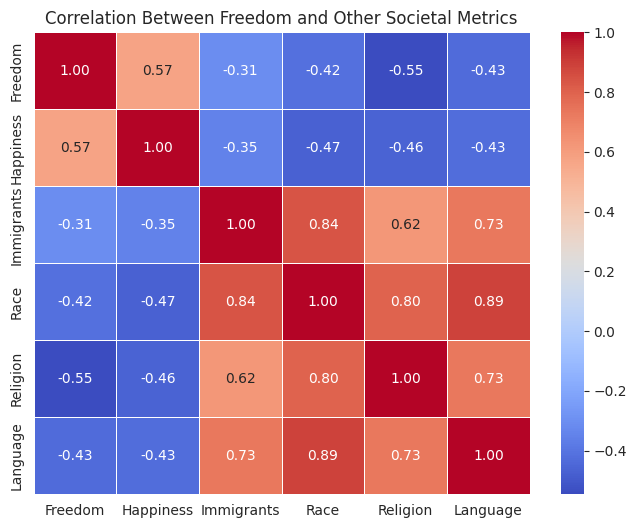

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get valid columns for correlation (Freedom-related)
freedom_corr_cols = ['Freedom', 'Happiness', 'Immigrants', 'Race', 'Religion', 'Language']

# Filter out non-existing columns
available_freedom_cols = [col for col in freedom_corr_cols if col in df_merged.columns]

# Compute correlation matrix
freedom_corr_matrix = df_merged[available_freedom_cols].corr(method='pearson')

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(freedom_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Freedom and Other Societal Metrics")
plt.show()


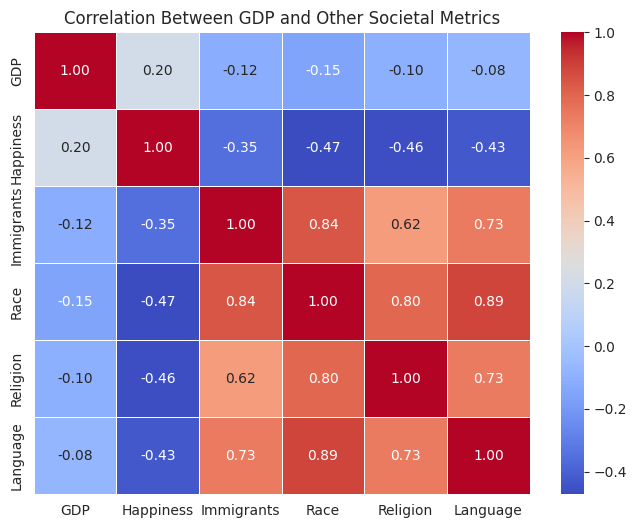

In [ ]:
# Get valid columns for correlation (GDP-related)
gdp_corr_cols = ['GDP', 'Happiness', 'Immigrants', 'Race', 'Religion', 'Language']

# Filter out non-existing columns
available_gdp_cols = [col for col in gdp_corr_cols if col in df_merged.columns]

# Compute correlation matrix
gdp_corr_matrix = df_merged[available_gdp_cols].corr(method='pearson')

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gdp_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between GDP and Other Societal Metrics")
plt.show()


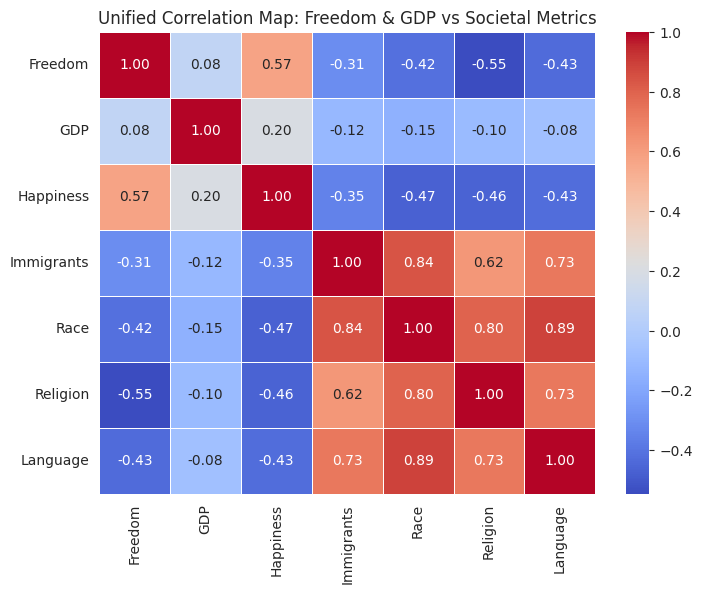

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define correlation columns (including both Freedom & GDP)
correlation_cols = ['Freedom', 'GDP', 'Happiness', 'Immigrants', 'Race', 'Religion', 'Language']

# Filter out non-existing columns
available_cols = [col for col in correlation_cols if col in df_merged.columns]

# Compute unified correlation matrix
combined_corr_matrix = df_merged[available_cols].corr(method='pearson')

# Visualize combined correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(combined_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Unified Correlation Map: Freedom & GDP vs Societal Metrics")
plt.show()


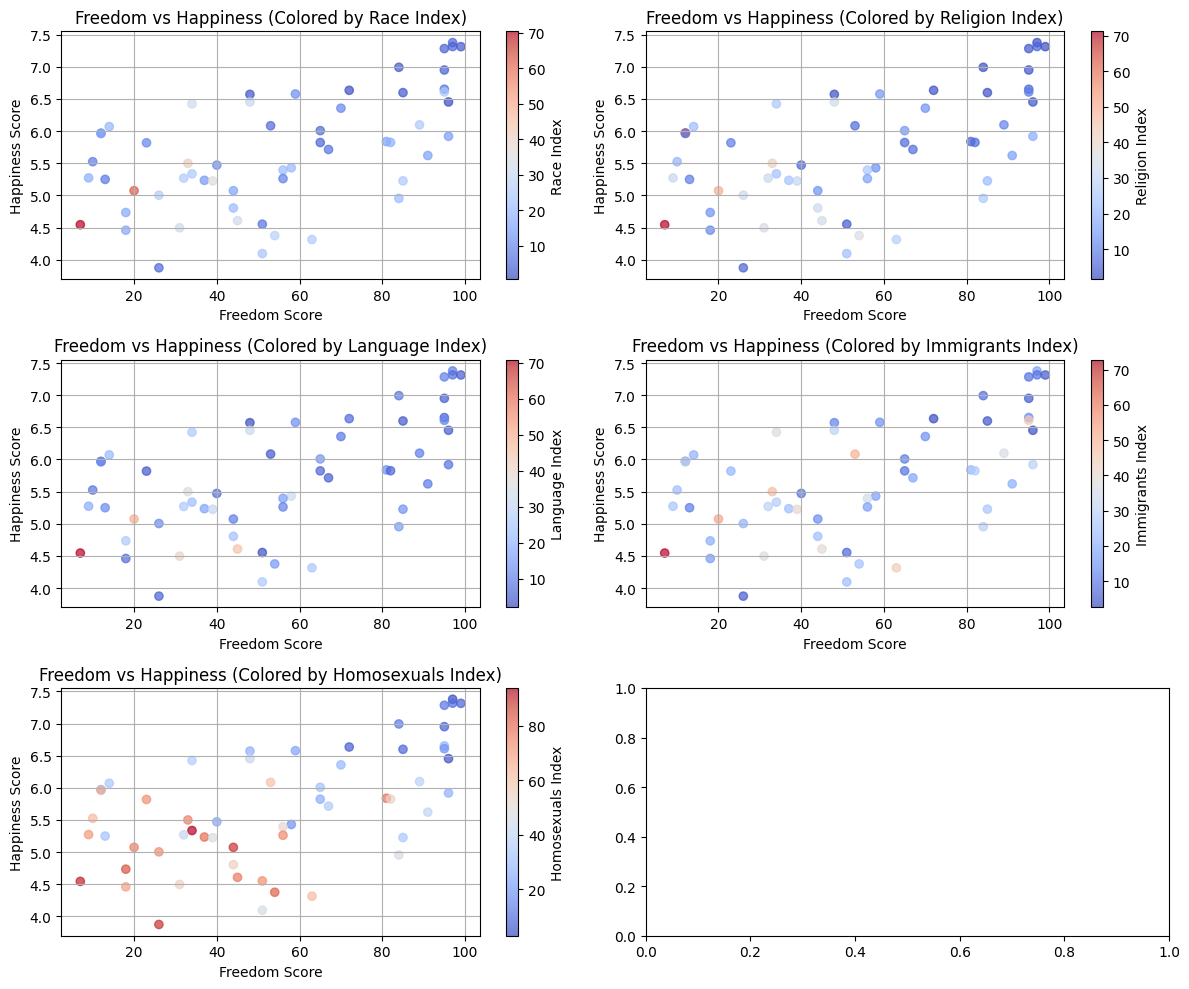

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv')

# Define bias indicators
bias_indicators = ['Race', 'Religion', 'Language', 'Immigrants', 'Homosexuals']

# Create scatter plots for each bias index
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns layout
axes = axes.flatten()  # Flatten axes array for easy iteration

for i, bias in enumerate(bias_indicators):
    scatter = axes[i].scatter(df['Freedom'], df['Happiness'], c=df[bias], cmap='coolwarm', alpha=0.7)

    # Add color bar for bias index
    fig.colorbar(scatter, ax=axes[i], label=f"{bias} Index")

    # Labels & title
    axes[i].set_xlabel("Freedom Score")
    axes[i].set_ylabel("Happiness Score")
    axes[i].set_title(f"Freedom vs Happiness (Colored by {bias} Index)")
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


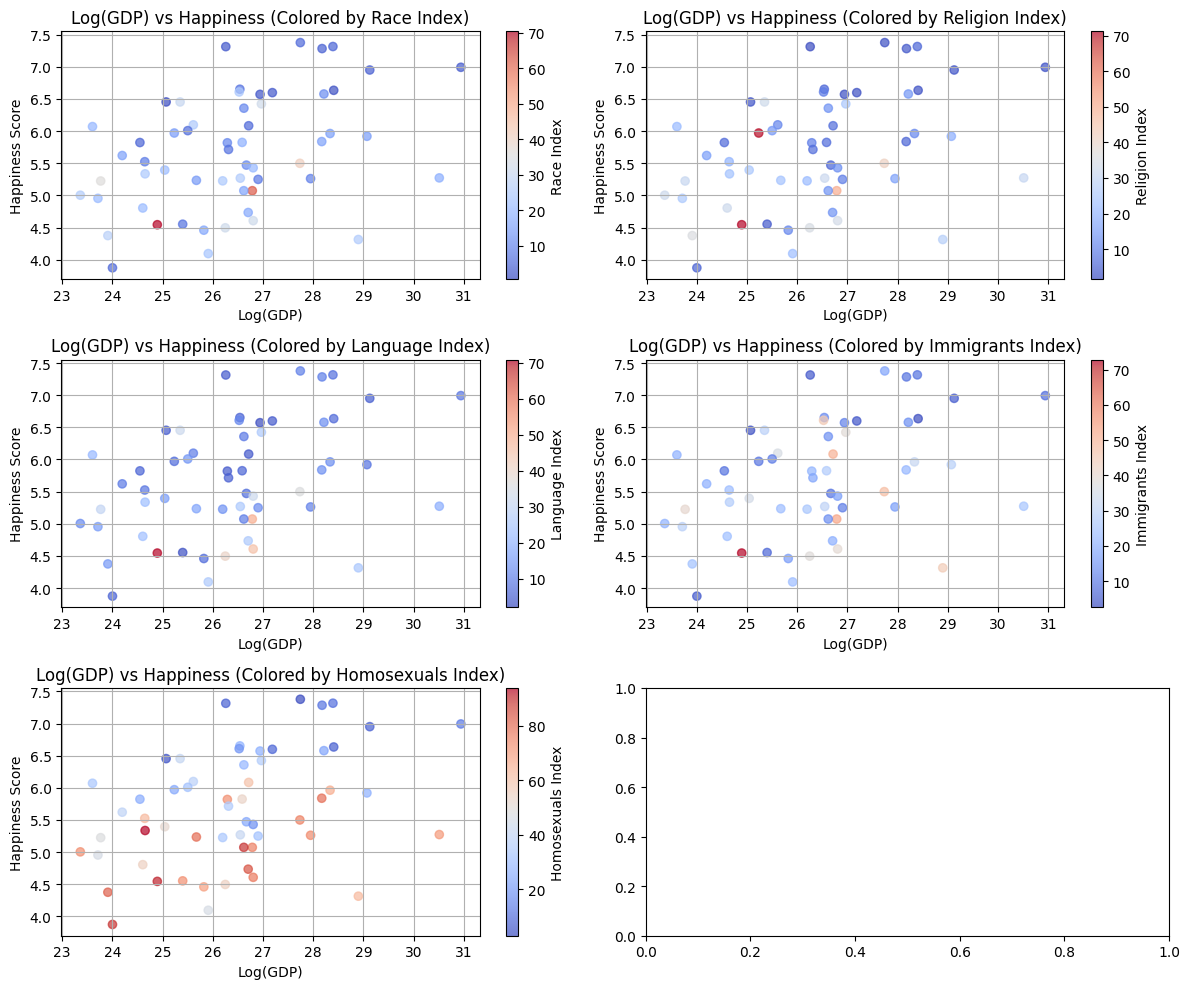

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/bigger_data.csv')

# Apply log transformation to GDP (avoid log(0) by replacing 0 with a small value)
df['Log_GDP'] = np.log1p(df['GDP'])  # log1p(x) = log(x + 1), preventing errors for zero values

# Define bias indicators
bias_indicators = ['Race', 'Religion', 'Language', 'Immigrants', 'Homosexuals']

# Create scatter plots for each bias index
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns layout
axes = axes.flatten()  # Flatten axes array for easy iteration

for i, bias in enumerate(bias_indicators):
    scatter = axes[i].scatter(df['Log_GDP'], df['Happiness'], c=df[bias], cmap='coolwarm', alpha=0.7)

    # Add color bar for bias index
    fig.colorbar(scatter, ax=axes[i], label=f"{bias} Index")

    # Labels & title
    axes[i].set_xlabel("Log(GDP)")
    axes[i].set_ylabel("Happiness Score")
    axes[i].set_title(f"Log(GDP) vs Happiness (Colored by {bias} Index)")
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
